# Crime Data Analysis: Chicago - Case Study
## Problem Definition
### Project Brief
Crime in Chicago has been worrisome to the Chicago PD. Reported crimes have been tracked on a daily basis since 2001 
and have been provided in the project data file. The Chicago PD would like to drastically reduce the spate of violent 
crimes reported in the city. Being effective involves knowing crime patterns and where they are likely to occur. 
It also involves equipping the Police Department appropriately. They have recruited you to conduct full data analytics 
and predictive modeling to uncover insights from the data that can be used to effectively mobilize and respond to crimes 
in shorter time cycles. They are interested in gleaning any insights that can help them determine What type of crimes 
to prepare for, Where these crimes are most likely to occur, What days of the week and periods to expect these crimes.
### Problem Statement
Conduct complete data analytics and predictive modeling to: <br>
* predict crime types by day type and district <br>
* Predict violent and non-violent crimes by day period and ward <br>
* Build a model to predict where the next crime would happen by District

Given that we have data on Chicago crime, this is a standard **classification problem**. In this study, our target variable Y is the probability of the next crime by district. <br>

 ### Dataset Analysis
In this case study, a chicago dataset was sourced from :[Codenet360](https://codenet360.com/mod/forum/discuss.php?d=169 ) 
which contains crime data for 2278726 crime entries with various information about the crimes in Chicago. I will use this dataset to predict crime types by day and district, violent and non-violent crimes by day period and ward, and build a 
model to predict where the next crime would happen by district.<br>

#### Importing Python libraries

In [174]:
import warnings

# Data manipulations
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import set_option
from numpy import set_printoptions

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

from dateutil.parser import parse
from datetime import datetime

# feature selection
from sklearn.feature_selection import SelectKBest, chi2

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# data balancing
from imblearn.combine import SMOTEENN

# modeling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

# Algorithms and Prediction
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV


# Evaluation
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree, export_text

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# hypertunning 
from sklearn import metrics

# cross validation
import statsmodels.api as sim

warnings.filterwarnings('ignore')

label_encoder = LabelEncoder()

### Data Cleaning and Formatting
#### Load in the data and Examine
We will be loading our data into a pandas dataframe, one of the most useful data structures for data science. Think of it as a spreadsheet within Python that we can easily manipulate, clean, and visualize. Pandas has many methods to help make the data science/machine learning pipeline as smooth as possible.

In [2]:
# Import the data 
filepath = 'C:/Users/ernest/Documents/workspace_4_GATIP/10_AUG_22/'
filename = 'crime_data_Proj1.csv'
data = pd.read_csv(filepath + filename)

In [3]:
# Display dataset columns
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
# Display top of dataframe
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


Taking a look at the raw data, we can already see a number of issues we'll have to solve. First of all, there are 23 columns and we don't know what many of them mean! All we know from the problem statement is that we want to 'predict crime types by day type and district', 'predict violent and non-violent crimes by day period and ward', and 'Build a model to predict where the next crime would happen by District'. Some of the other column definitions can be reasonably guessed, but others are difficult to understand (I do research and information from my supervisor I can say I understood each column). In machine learning, this isn't actually a problem, because we let the model decide which features are important. Sometimes we may not even be given column names or told what we are predicting. Nonetheless, I like to understand the problem to the extent possible, and because we also want to interpret the model results, it would be a good idea to have some knowledge of the columns. 

### Data Types and Missing Values

In [5]:
# Column dataset by datatypes
data.columns.to_series().groupby(data.dtypes).groups

{bool: ['Arrest', 'Domestic'], int64: ['Unnamed: 0', 'ID', 'Beat', 'Year'], float64: ['District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude'], object: ['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'FBI Code', 'Updated On', 'Location']}

In [6]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [7]:
# check dataset for missing values
data.isna().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [8]:
# check dataset for null value
data.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [9]:
# check dataset for skewness: Skew refers to a distribution that is assumed Gaussian (normal or bell curve) 
# that is shifted or squashed in one direction or another.

skew = data.skew()
print(skew)

Unnamed: 0        1.720875e-15
ID                3.792553e-02
Arrest            1.065947e+00
Domestic          2.104784e+00
Beat              3.888004e-01
District          4.364170e-01
Ward              1.715494e-01
Community Area    1.800930e-01
X Coordinate     -4.438138e+00
Y Coordinate     -2.562736e+00
Year              3.465047e-01
Latitude         -2.614833e+00
Longitude        -3.857195e+00
dtype: float64


In [10]:
# Function to calculate missing values by column

def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values_table(data)

Your selected dataframe has 23 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
Ward,184695,8.1
Community Area,184267,8.1
X Coordinate,23985,1.1
Y Coordinate,23985,1.1
Latitude,23985,1.1
Longitude,23985,1.1
Location,23985,1.1
Location Description,2877,0.1
District,12,0.0
Case Number,1,0.0


Although we want to be careful to not discard information and should be careful when dropping columns, if a column has a high percentage of missing values, then it probably will not be of much use. But that is not the case here.

In [12]:
# drop null values and NaN
data = data.dropna()
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [13]:
# check dataset again for missing values
data.isna().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [14]:
# check dataset again for null value
data.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

### Feature Extraction.

In [15]:
# extracting 'Day', 'Month', and 'Period' from the 'Date' column.

tcol = data.Date

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in tcol]
dayList = []
monthList = []
periodList = []

for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1] == 'AM':
        period = 'Morning'
    elif row[1] == 'PM' and (int(row[0][11:13])<4 or int(row[0][11:13])==12):
        period = 'Afternoon'
    elif row[1] == 'PM' and int(row[0][11:13])>8:
        period = 'Evening'
    elif row[1] == 'PM' and int(row[0][11:13])<12:
        period = 'Night'
    else:
        period = 'Unknown'

    dayList.append(day)
    monthList.append(month)
    periodList.append(period)

print(len(dayList), len(monthList), len(periodList))

data['Month'] = monthList
data['Day'] = dayList
data['Period'] = periodList
data.head()

2070581 2070581 2070581


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Period
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)",Jul,Sat,Afternoon
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)",Jul,Tue,Morning
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)",Apr,Fri,Morning
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)",Jul,Mon,Morning
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)",Jul,Sun,Morning


In [16]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'Month', 'Day', 'Period'],
      dtype='object')

### Exploratory Data Analysis.

Exploratory Data Analysis (EDA) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine.

#### Data Visualization

2003    141488
2004    140152
2005    134629
2006    133955
2007    130308
2008    125713
2009    116308
2010    110900
2011    105436
2002    103271
2012    100524
2013     91534
2014     82094
2016     80235
2017     79317
2018     79265
2015     77264
2019     77205
2020     62277
2021     60855
2022     36671
2001      1180
Name: Year, dtype: int64


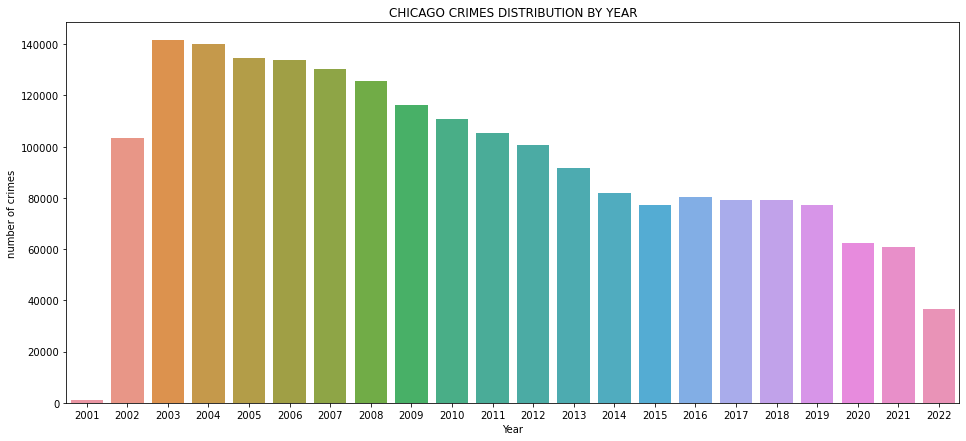

In [17]:
# Year

print(data['Year'].value_counts())
plt.figure(figsize = (16, 7))
sns.countplot(x = 'Year', data = data)
plt.ylabel('number of crimes')
plt.title('CHICAGO CRIMES DISTRIBUTION BY YEAR')
plt.show()

THEFT                                436851
BATTERY                              381760
CRIMINAL DAMAGE                      237244
NARCOTICS                            199506
ASSAULT                              135223
OTHER OFFENSE                        128772
BURGLARY                             114981
MOTOR VEHICLE THEFT                   95269
DECEPTIVE PRACTICE                    87658
ROBBERY                               78447
CRIMINAL TRESPASS                     57954
WEAPONS VIOLATION                     28470
PROSTITUTION                          18260
OFFENSE INVOLVING CHILDREN            14430
PUBLIC PEACE VIOLATION                14396
SEX OFFENSE                            7534
CRIM SEXUAL ASSAULT                    7299
INTERFERENCE WITH PUBLIC OFFICER       5298
GAMBLING                               3991
LIQUOR LAW VIOLATION                   3839
ARSON                                  3500
HOMICIDE                               3484
KIDNAPPING                      

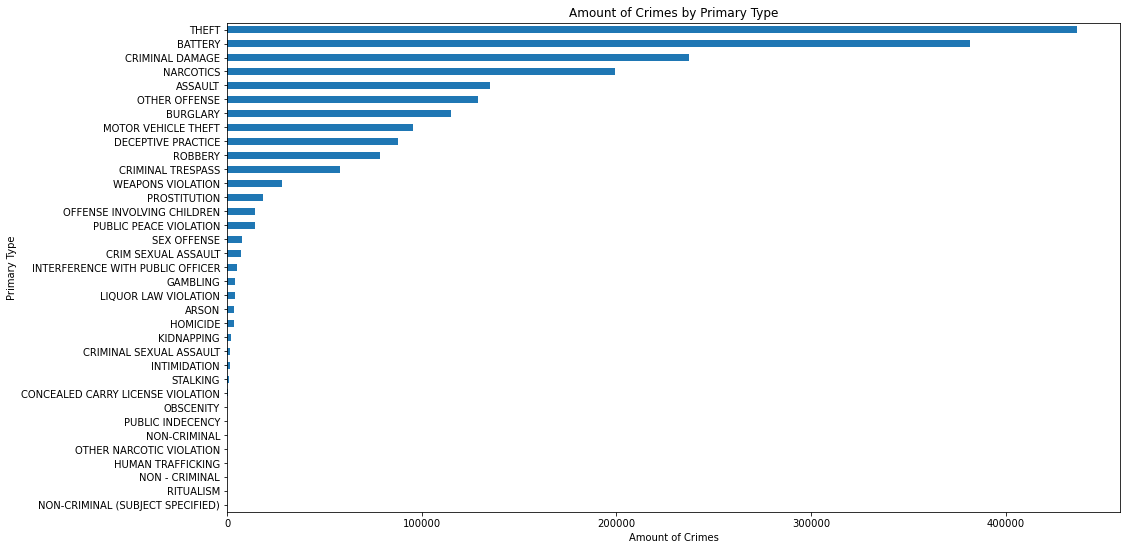

In [18]:
# Plot Bar Chart visualize Primary Types
print(data['Primary Type'].value_counts())
plt.figure(figsize=(16,9))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')
data.groupby(data['Primary Type']).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

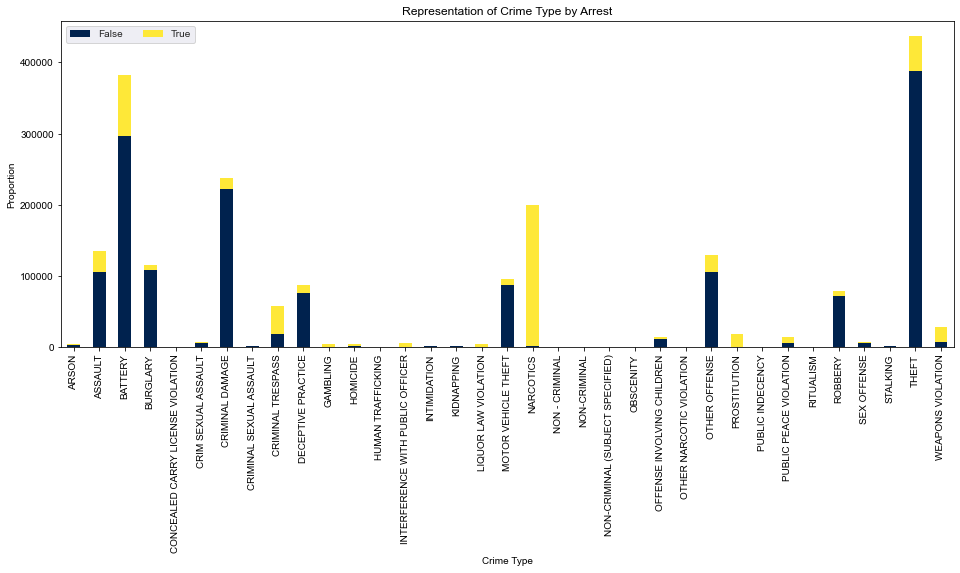

In [19]:
# graphical representation of Arrest and Non-Arrest
cross_tab = pd.crosstab(index=data['Arrest'], columns=data['Primary Type'])
cross_tab.T.plot(kind='bar', stacked=True, colormap='cividis', figsize=(16, 6))
sns.set_style("darkgrid")
plt.xticks(rotation=90)
plt.legend(loc="upper left", ncol=2, )
plt.title('Representation of Crime Type by Arrest')
plt.xlabel("Crime Type")
plt.ylabel("Proportion");

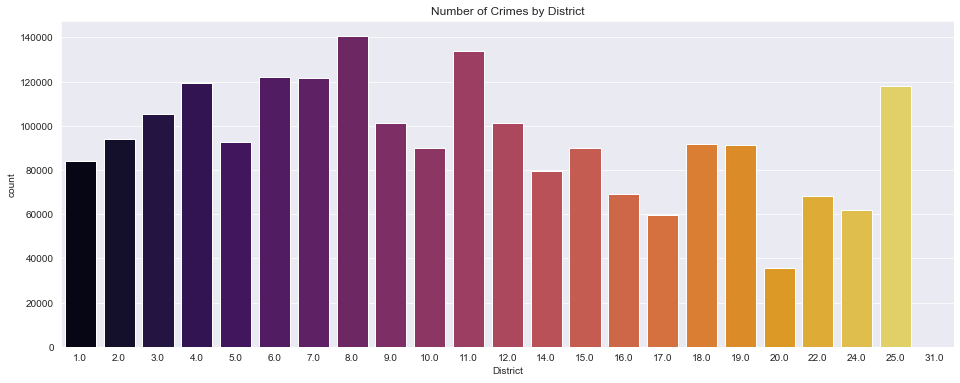

In [20]:
# graphical representation of the number of crime by district
f = plt.figure(figsize=(16, 6))
plt.title("Number of Crimes by District")
sns.set_style("darkgrid")
sns.countplot(x=data["District"], palette='inferno');

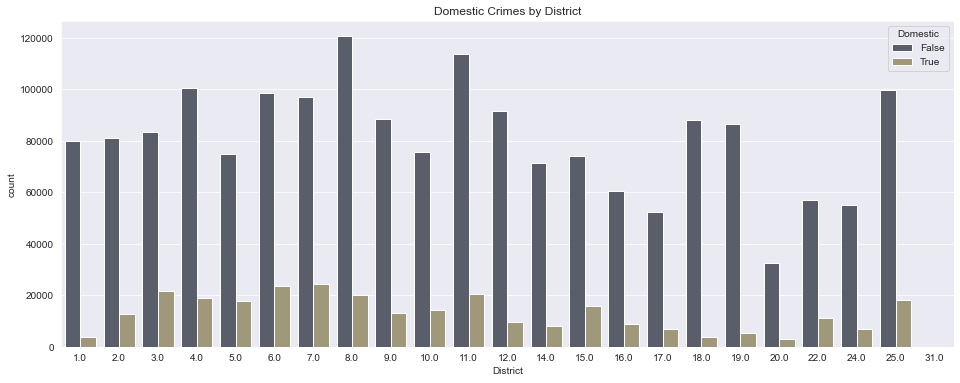

In [21]:
# graphical representation of Domestic and Non-Domestic crime by district
sns.set_style("darkgrid")
plt.figure(figsize=(16, 6))
plt.title('Domestic Crimes by District')
sns.countplot(x="District", data=data, hue="Domestic", palette='cividis');

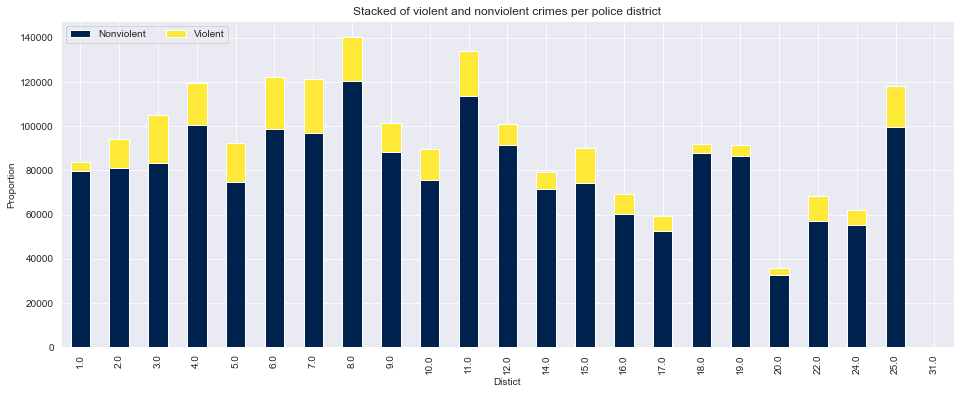

In [22]:
# graphical representation of violent and non-violent crime by district
sns.set_style("darkgrid")
cross_tab = pd.crosstab(index=data['Domestic'], columns=data['District'])
cross_tab.T.plot(kind='bar', stacked=True, colormap='cividis', figsize=(16, 6))
plt.xticks(rotation=90)
plt.legend(loc="upper left", labels=["Nonviolent", "Violent"], ncol=2)
plt.title("Stacked of violent and nonviolent crimes per police district")
plt.xlabel("Distict")
plt.ylabel("Proportion");

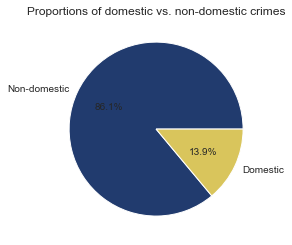

In [23]:
df_by_domestic = data.Domestic.value_counts()
sns.set_style("darkgrid")
#define Seaborn color palette to use
colors = [sns.color_palette('cividis')[0], sns.color_palette('cividis')[5]]
#create pie chart
plt.pie(df_by_domestic, labels = ["Domestic", "Non-domestic"][::-1],
colors = colors, autopct='%.1f%%')
plt.title("Proportions of domestic vs. non-domestic crimes")
plt.show()

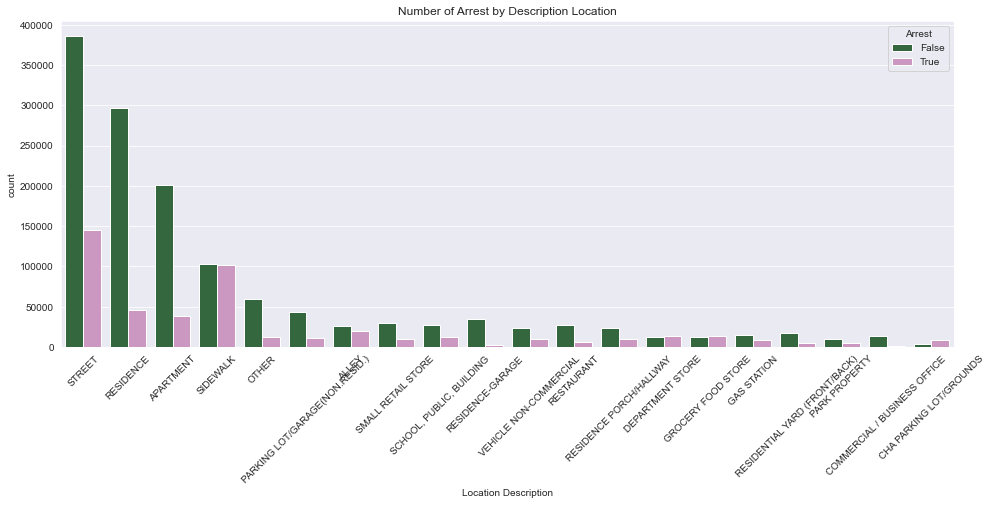

In [24]:
# graphical representation of arrest by description location of crime
plt.figure(figsize = (16, 6))
plt.xticks(rotation=45)
plt.title('Number of Arrest by Description Location')
sns.set_style('darkgrid')
sns.countplot(x= 'Location Description', hue="Arrest", data = data , order = data['Location Description'].value_counts().iloc[:20].index, palette='cubehelix');

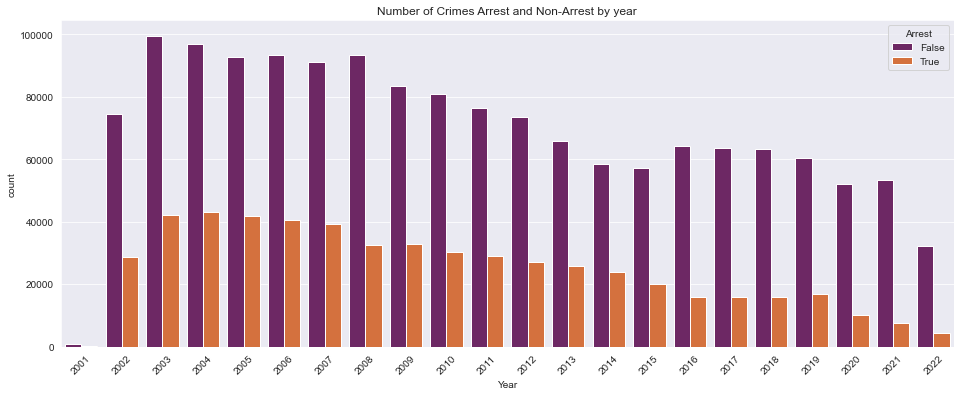

In [25]:
# graphical representation of arrest and non arrest by year
plt.figure(figsize = (16, 6))
plt.xticks(rotation=45)
plt.title("Number of Crimes Arrest and Non-Arrest by year")
sns.set_style('darkgrid')
sns.countplot(x= 'Year', hue="Arrest", data = data, order = sorted(data.Year.unique()),
palette='inferno');

In [26]:
def barplot_func(data, col):
    '''
    A function of the graphical representation of Arrest by other columns
    '''
    if data[col].dtype in ['object', 'float64']:
        fig, ((ax1, ax2)) = plt.subplots(2,1,figsize=(16,10))
        sns.set_style("darkgrid")
        plot_data = data[['Arrest', col]].dropna()
        data_1 = plot_data.loc[plot_data['Arrest'] == True]
        data_2 = plot_data.loc[plot_data['Arrest'] == False]
        
        data_1.groupby(col)[col].count().nlargest(10).sort_values(ascending=False).plot(kind='bar', ax=ax1, title='Arrest: ' + col)
        data_2.groupby(col)[col].count().nlargest(10).sort_values(ascending=False).plot(kind='bar', ax=ax2, title='non Arrest: ' + col)
        
    return plt.show()

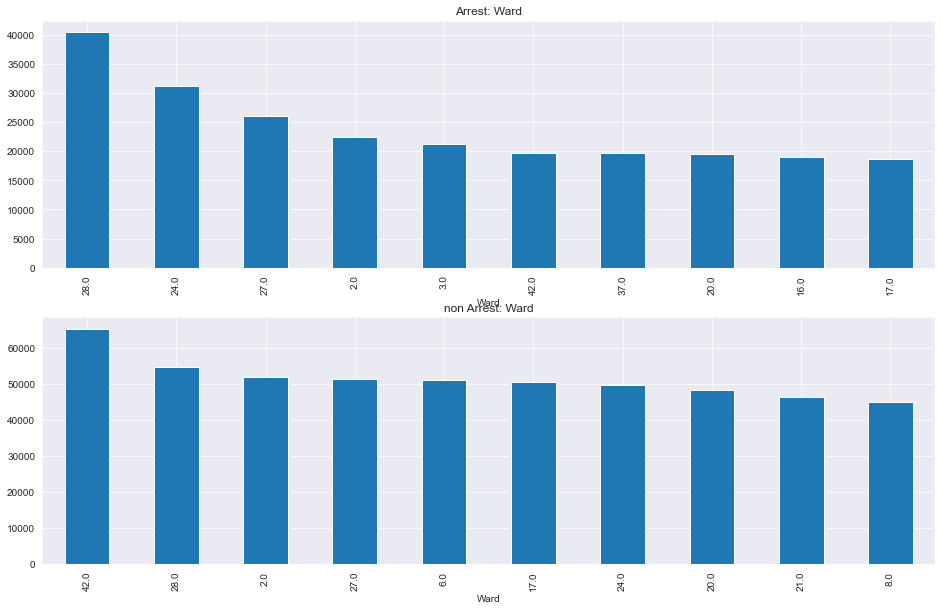

In [27]:
barplot_func(data, 'Ward')

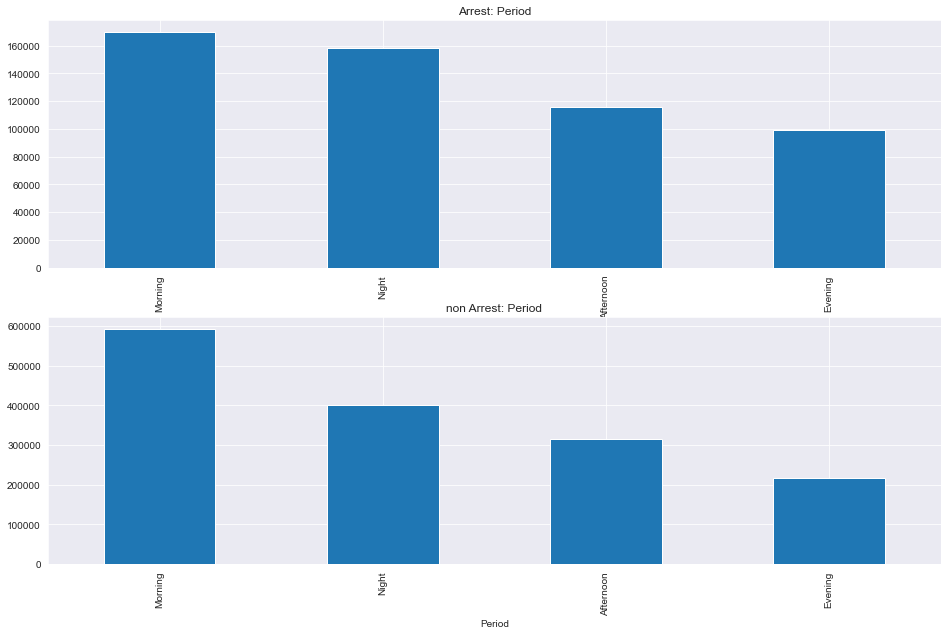

In [28]:
barplot_func(data, 'Period')

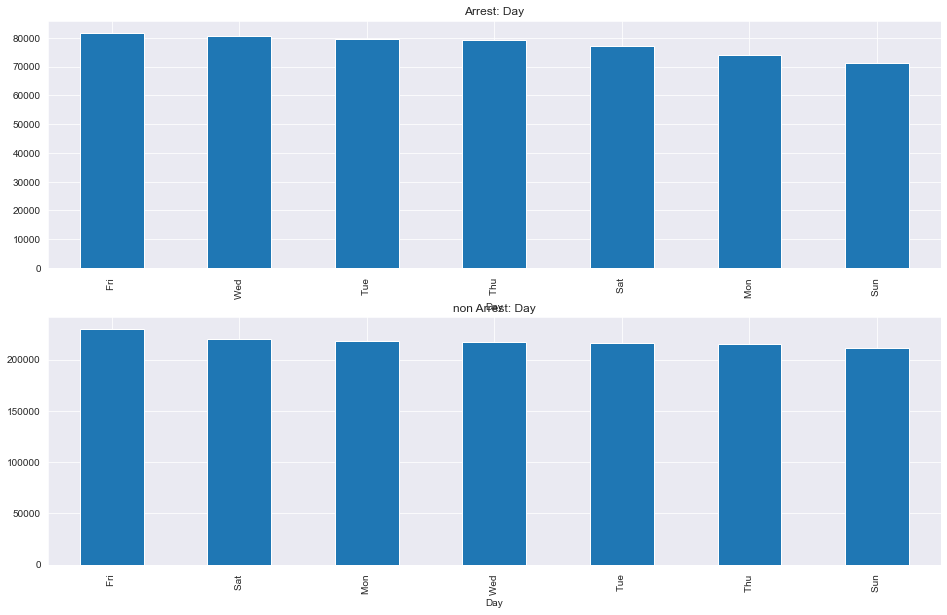

In [29]:
barplot_func(data, 'Day')

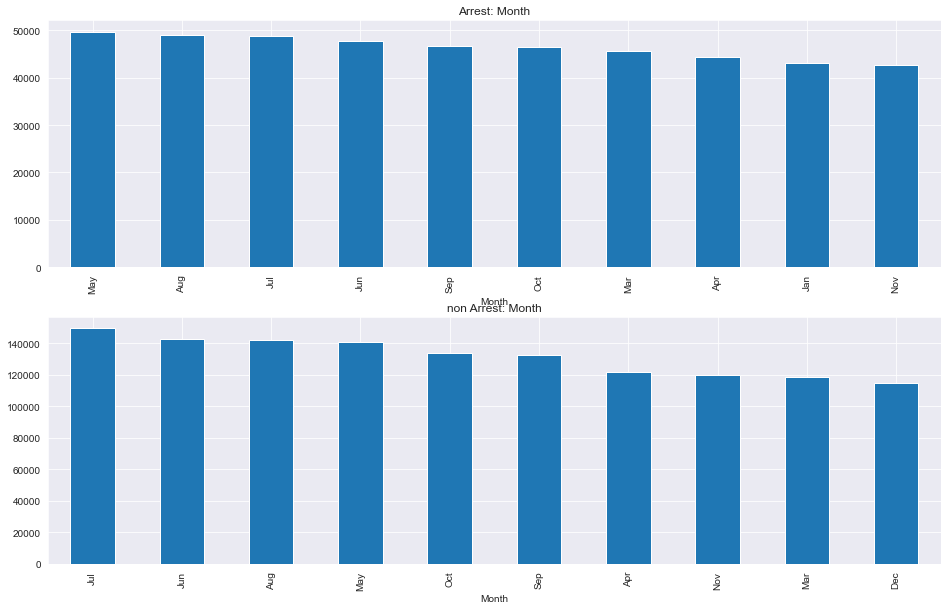

In [30]:
barplot_func(data, 'Month')

In [31]:
def barplot_func_dom(data, col):
    '''
    A function of the graphical representation of Domestic by other columns
    '''
    if data[col].dtype in ['object', 'float64']:
        fig, ((ax1, ax2)) = plt.subplots(2,1,figsize=(16,10))
        plot_data = data[['Domestic', col]].dropna()
        data_1 = plot_data.loc[plot_data['Domestic'] == True]
        data_2 = plot_data.loc[plot_data['Domestic'] == False]
        
        data_1.groupby(col)[col].count().nlargest(10).sort_values(ascending=False).plot(kind='bar', ax=ax1, title='Domestic: ' + col)
        data_2.groupby(col)[col].count().nlargest(10).sort_values(ascending=False).plot(kind='bar', ax=ax2, title='non Domestic: ' + col)
        
    return plt.show()

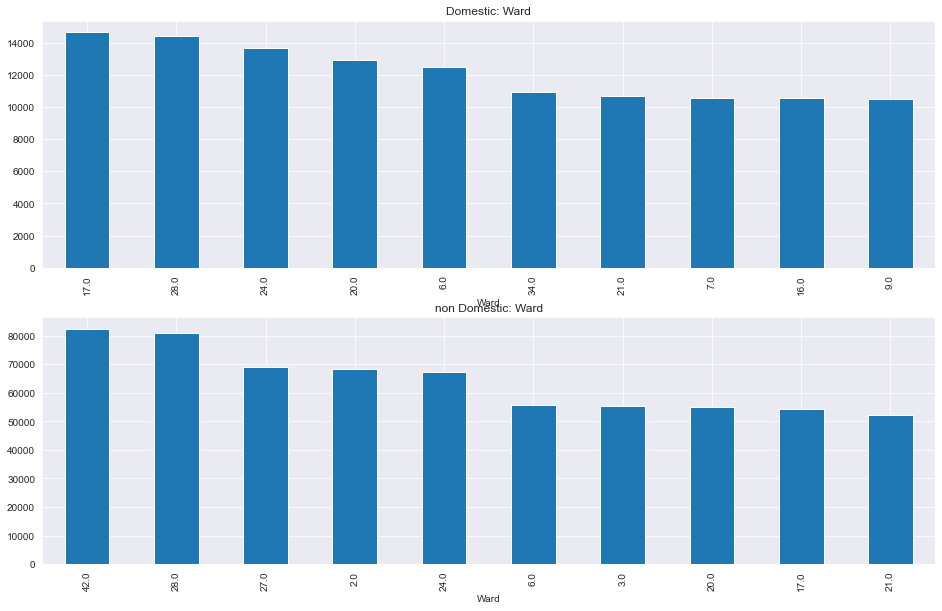

In [32]:
barplot_func_dom(data, 'Ward')

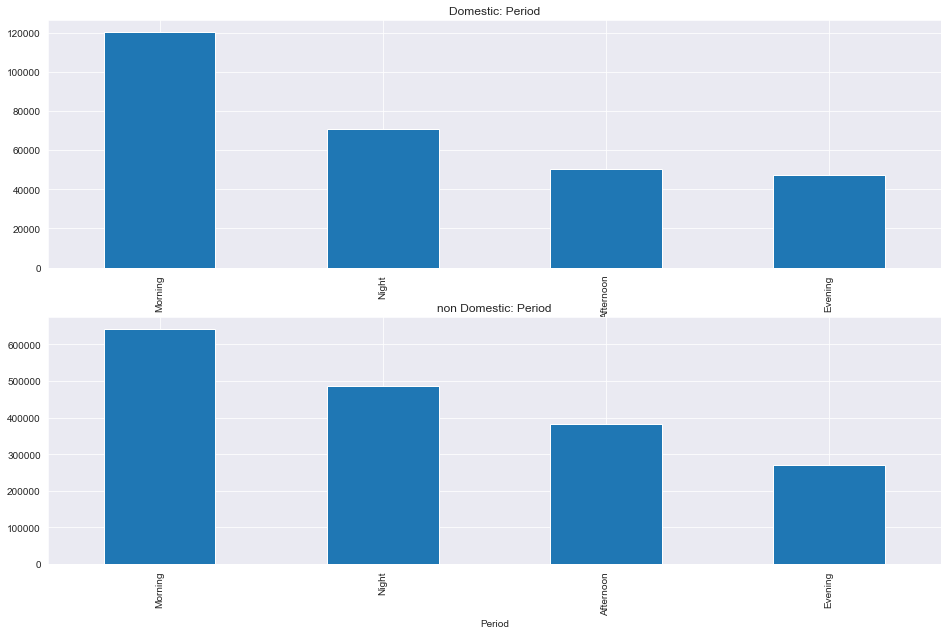

In [33]:
barplot_func_dom(data, 'Period')

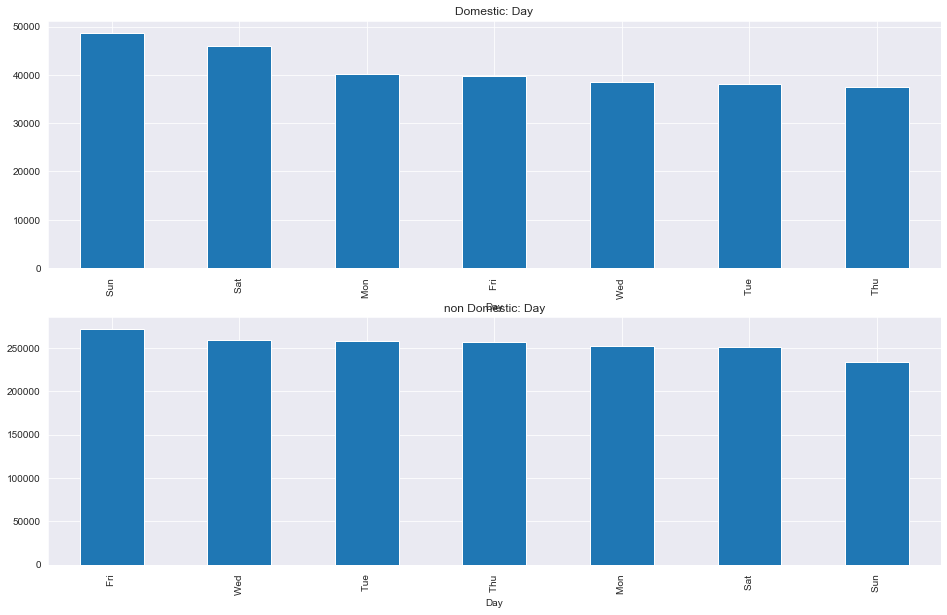

In [34]:
barplot_func_dom(data, 'Day')

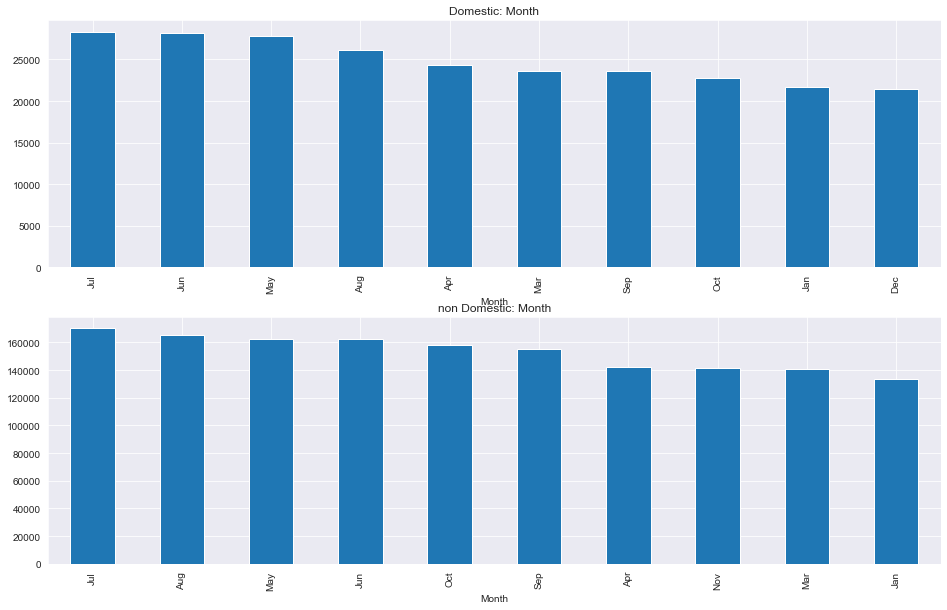

In [35]:
barplot_func_dom(data, 'Month')

#### Time Series Visualization

In [54]:
# convert the 'Date' column to datetime
data['Date'] =  pd.to_datetime(data['Date'])

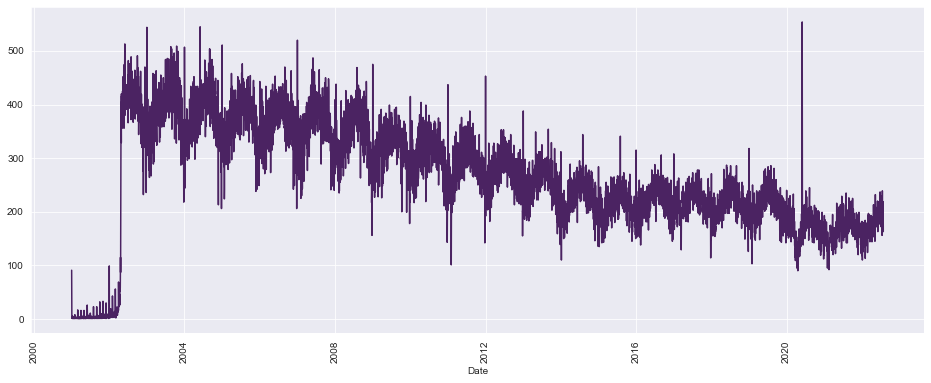

In [55]:
plt.figure(figsize=(16, 6))
data.Date.groupby(data.Date.dt.date).size().plot(rot=90, colormap="flare_r");

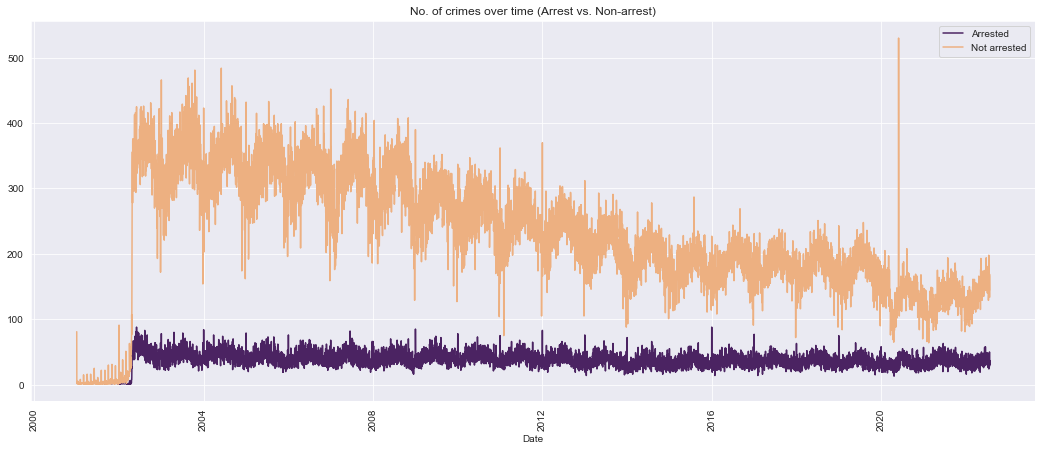

In [57]:
df_arrest = pd.DataFrame(index=data.Date.dt.date)
df_arrest["Arrested"] = data[data.Domestic].groupby(data.Date.dt.date).size()
df_arrest["Not arrested"] = data[~data.Domestic].groupby(data.Date.dt.date).size()
# checking violence over time
df_arrest.plot(rot=90, figsize=(18, 7),
colormap="flare_r",
title="No. of crimes over time (Arrest vs. Non-arrest)");

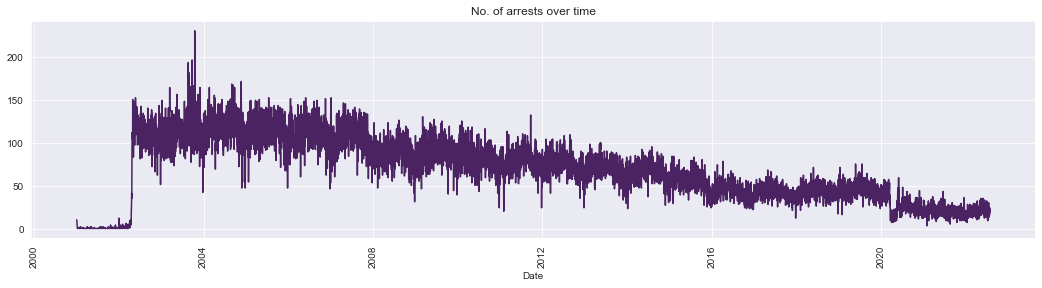

In [58]:
df_arrest = data[data.Arrest == True]
df_arrest.groupby(df_arrest.Date.dt.date).size().plot(rot=90, figsize=(18, 4),
title="No. of arrests over time",
colormap="flare_r");

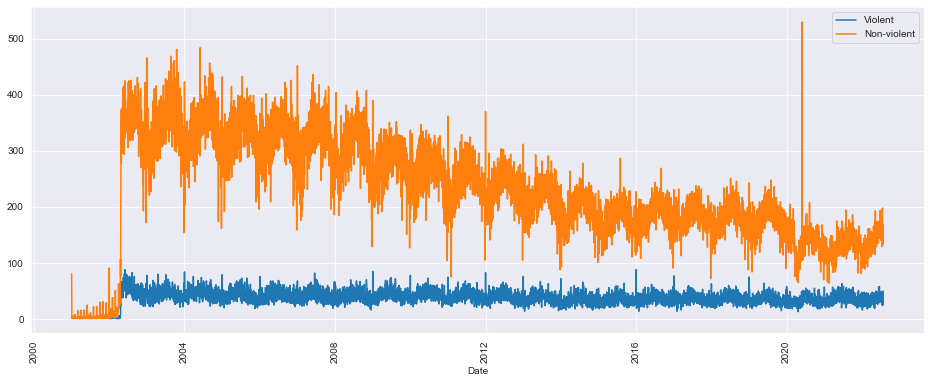

In [59]:
df_domestic = pd.DataFrame(index=data.Date.dt.date)
df_domestic["Violent"] = data[data.Domestic].groupby(data.Date.dt.date).size()
df_domestic["Non-violent"] = data[~data.Domestic].groupby(data.Date.dt.date).size()
# checking violence over time
df_domestic.plot(rot=90, figsize=(16, 6));

####  Reducing the number of classes in "Primary Type" 

In [36]:
# the Primary Type label needed to be reduces

# First, we sum up the amount of Crime Type happened and select the some classes
all_classes = data.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(20)
unwanted_classes

,Primary Type,Amt
31,SEX OFFENSE,7534
5,CRIM SEXUAL ASSAULT,7299
13,INTERFERENCE WITH PUBLIC OFFICER,5298
10,GAMBLING,3991
16,LIQUOR LAW VIOLATION,3839
0,ARSON,3500
11,HOMICIDE,3484
15,KIDNAPPING,1802
7,CRIMINAL SEXUAL ASSAULT,1412
14,INTIMIDATION,1279


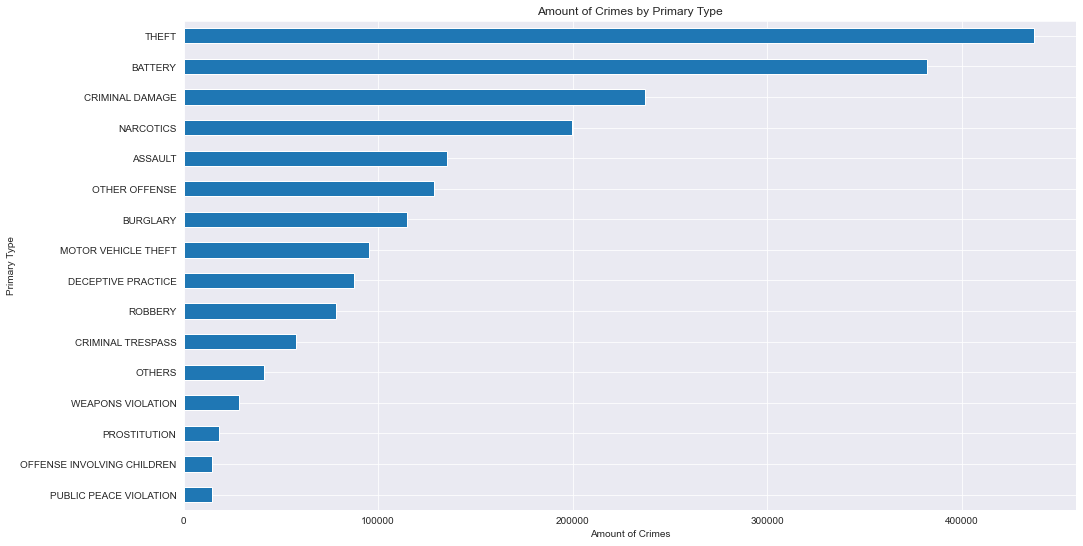

In [37]:
# After that, we replaced it with label 'OTHERS'
data.loc[data['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(16,9))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

data.groupby([data['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [38]:
data['Primary Type'] = data['Primary Type'].replace(['OTHERS'],'OTHER OFFENSE')

In [39]:
data['Primary Type'].unique()

array(['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BURGLARY', 'ASSAULT',
       'ROBBERY', 'NARCOTICS', 'MOTOR VEHICLE THEFT', 'BATTERY',
       'OTHER OFFENSE', 'PROSTITUTION', 'DECEPTIVE PRACTICE', 'THEFT',
       'CRIMINAL TRESPASS', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION'], dtype=object)

In [40]:
print(len(data))
print(data['Unnamed: 0'].nunique())
print(data['ID'].nunique())

2070581
2070581
2070581


In [41]:
# Unnamed: 0 and ID are identical to the index of the dataset
dataframe = data.drop(['Unnamed: 0', 'ID'], axis=1)

In [42]:
# return all dataframe columns with 'object' and 'bool' datatypes
obj_data = dataframe.select_dtypes(include=['object', 'bool'], exclude=None)
obj_data.head(5)

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,FBI Code,Updated On,Location,Month,Day,Period
0,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,14,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)",Jul,Sat,Afternoon
1,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,15,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)",Jul,Tue,Morning
2,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,05,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)",Apr,Fri,Morning
3,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,08A,07/30/2018 03:52:24 PM,"(41.881217483, -87.730589961)",Jul,Mon,Morning
4,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,04A,07/18/2021 04:56:02 PM,"(41.874173691, -87.668082118)",Jul,Sun,Morning


In [43]:
# Label Encoding will be used for columns with 2 or more unique values

le = LabelEncoder()
le_count = 0

for col in dataframe.columns[1:]:
    if dataframe[col].dtype == 'object' or 'bool':
        if len(list(dataframe[col].unique())) >= 2:
            le.fit(dataframe[col])
            dataframe[col] = le.transform(dataframe[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

dataframe.head()

23 columns were label encoded.


,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Period
0,HP485721,697383,30275,156,3,460,171,0,0,45,...,67163,24442,7,531,66355,440989,66386,5,2,0
1,JB372830,717442,30995,174,14,466,139,1,0,41,...,57876,19952,17,2192,50719,410755,50744,5,5,2
2,HN308568,366492,25726,83,2,215,145,1,0,207,...,20541,110378,6,531,434177,79563,434484,0,0,2
3,JB361368,687869,227,77,0,419,125,0,0,134,...,22011,71431,17,2109,261368,88021,261525,5,1,2
4,JE297624,643520,8497,63,0,25,134,0,0,155,...,39024,69081,20,1986,247688,250443,247831,5,3,2


#### Statistical Analysis

In [44]:
# Numerical Analysis
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,2070581.0,617893.782708,352361.823479,0.0,315392.0,620545.0,921342.0,1230192.0
Block,2070581.0,16644.915900,9965.124325,0.0,7503.0,16897.0,25788.0,33840.0
IUCR,2070581.0,125.716651,85.623267,0.0,67.0,95.0,156.0,388.0
Primary Type,2070581.0,6.263125,4.767148,0.0,2.0,6.0,12.0,14.0
Description,2070581.0,285.486678,150.389511,0.0,189.0,332.0,419.0,510.0
Location Description,2070581.0,127.184836,56.163153,0.0,96.0,145.0,171.0,197.0
Arrest,2070581.0,0.262441,0.439961,0.0,0.0,0.0,1.0,1.0
Domestic,2070581.0,0.139384,0.346347,0.0,0.0,0.0,0.0,1.0
Beat,2070581.0,139.533748,86.475086,0.0,65.0,129.0,212.0,302.0
District,2070581.0,9.702697,6.152527,0.0,5.0,9.0,15.0,22.0


#### Correlation

<AxesSubplot:>

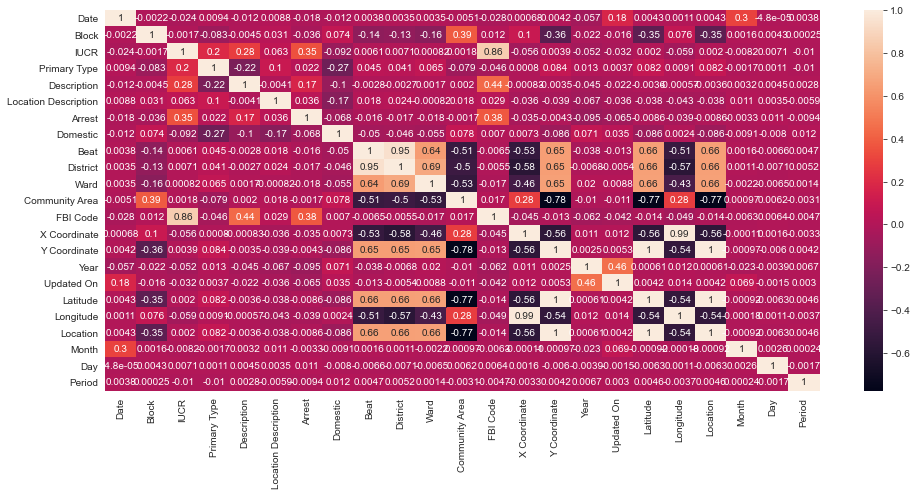

In [45]:
set_option('display.width', 100)

plt.figure(figsize=(16,7))

sns.heatmap(dataframe.corr(), annot = True)

In [46]:
cor_matrix = dataframe.corr().abs()
print(cor_matrix)

                          Date     Block      IUCR  Primary Type  Description  \
Date                  1.000000  0.002235  0.023655      0.009436     0.011820   
Block                 0.002235  1.000000  0.001730      0.083226     0.004549   
IUCR                  0.023655  0.001730  1.000000      0.195616     0.282670   
Primary Type          0.009436  0.083226  0.195616      1.000000     0.217418   
Description           0.011820  0.004549  0.282670      0.217418     1.000000   
Location Description  0.008829  0.030642  0.063052      0.100748     0.004105   
Arrest                0.017577  0.035864  0.350438      0.021774     0.168731   
Domestic              0.011876  0.073905  0.092278      0.273141     0.104478   
Beat                  0.003806  0.139313  0.006054      0.045378     0.002791   
District              0.003499  0.126646  0.007120      0.040646     0.002677   
Ward                  0.003472  0.162064  0.000822      0.065220     0.001653   
Community Area        0.0050

In [47]:
# Creating the Correlation matrix and Selecting the Upper trigular matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                      Date     Block      IUCR  Primary Type  Description  Location Description  \
Date                   NaN  0.002235  0.023655      0.009436     0.011820              0.008829   
Block                  NaN       NaN  0.001730      0.083226     0.004549              0.030642   
IUCR                   NaN       NaN       NaN      0.195616     0.282670              0.063052   
Primary Type           NaN       NaN       NaN           NaN     0.217418              0.100748   
Description            NaN       NaN       NaN           NaN          NaN              0.004105   
Location Description   NaN       NaN       NaN           NaN          NaN                   NaN   
Arrest                 NaN       NaN       NaN           NaN          NaN                   NaN   
Domestic               NaN       NaN       NaN           NaN          NaN                   NaN   
Beat                   NaN       NaN       NaN           NaN          NaN                   NaN   
District  

In [48]:
# display the columns with high correlation
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['Latitude', 'Longitude', 'Location']


In [49]:
# drop columns correlated features - Date has been unbundled already; 

new_data = dataframe.drop(['Case Number', 'Date', 'Latitude', 'Longitude', 'Location'], axis=1)
new_data.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Month,Day,Period
0,30275,156,3,460,171,0,0,45,3,9,46,16,67163,24442,7,531,5,2,0
1,30995,174,14,466,139,1,0,41,3,7,47,17,57876,19952,17,2192,5,5,2
2,25726,83,2,215,145,1,0,207,15,38,12,6,20541,110378,6,531,0,0,2
3,227,77,0,419,125,0,0,134,10,27,26,9,22011,71431,17,2109,5,1,2
4,8497,63,0,25,134,0,0,155,11,26,28,4,39024,69081,20,1986,5,3,2


In [50]:
new_data.shape

(2070581, 19)

#### Removing Outliers

When we remove outliers, we want to be careful that we are not throwing away measurements just because they look strange. They may be the result of actual phenomenon that we should further investigate. When removing outliers, I try to be as conservative as possible, using the definition of an [extreme outlier](https://people.richland.edu/james/lecture/m170/ch03-pos.html): 

* On the low end, an extreme outlier is below  $\text{First Quartile} -1.2 * \text{Interquartile Range}$
* On the high end, an extreme outlier is above $\text{Third Quartile} + 1.2 * \text{Interquartile Range}$

In this case, I will only remove the single outlying point and see how the distribution looks.

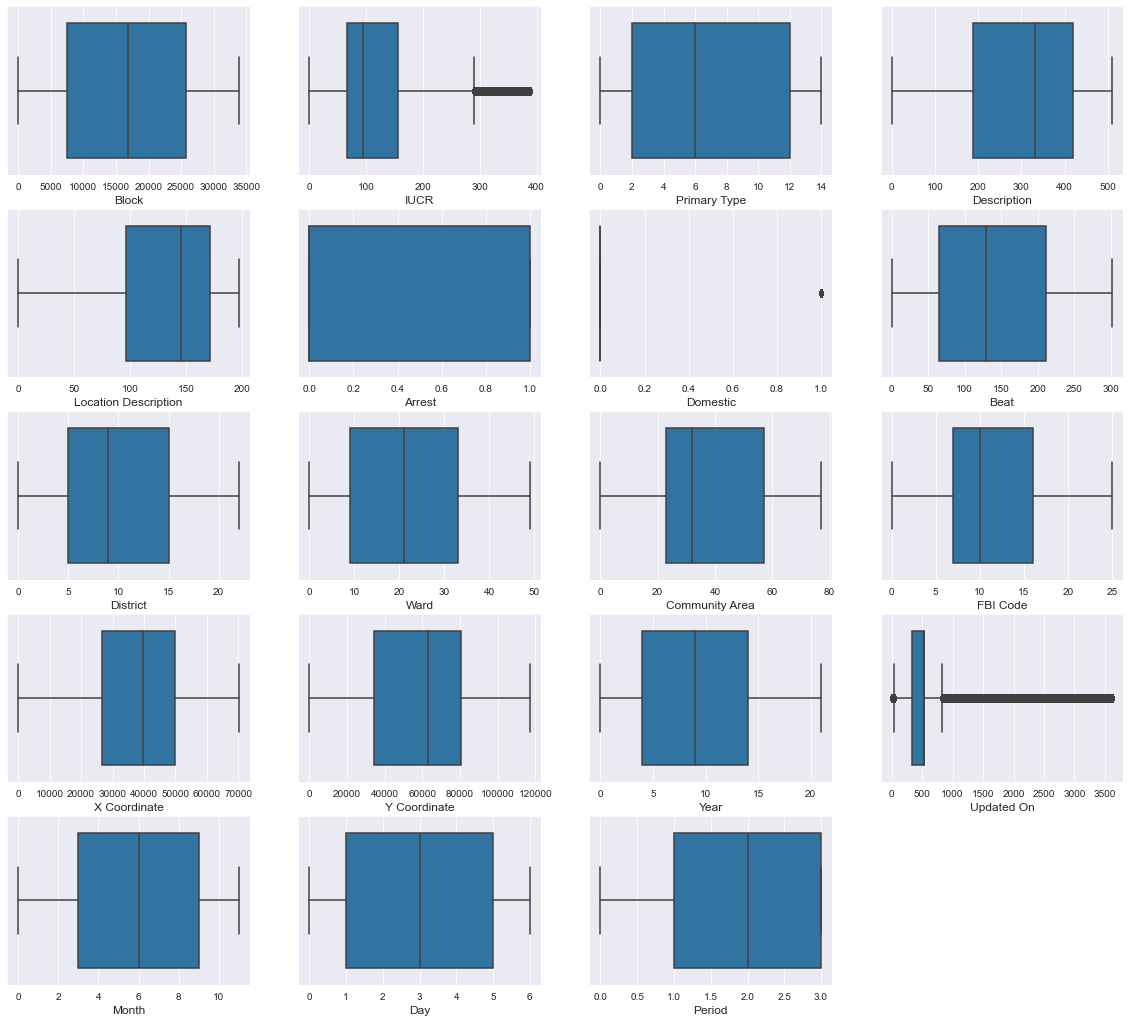

In [51]:
# Checking for outliers
plt.figure(figsize = (20, 18))
for i in range (len(new_data.columns)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x = new_data.iloc[:, i])
    plt.xlabel(new_data.columns[i], size = 12)

In [52]:
# Removing outliers
def Outliers(new_data, feature):
    IQ1 = new_data[feature].quantile(0.25)
    IQ3 = new_data[feature].quantile(0.75)
    IQR = IQ3 - IQ1
    
    lower_bound = IQ1 - 1.2 * IQR
    upper_bound = IQ3 + 1.2 * IQR
    
    index = new_data.index[ (new_data[feature] < lower_bound) | (new_data[feature] > upper_bound) ]
    return index

In [53]:
# Getting index of all the outliers
index = []
for i in new_data.columns:
    index.extend(Outliers(new_data, i))
index = set(index)
print("Total number of outliers are {}".format(len(index)))

# Dropping all the outliers
new_data.drop(index, inplace = True, axis = 0)
new_data.shape

Total number of outliers are 708746


(1361835, 19)

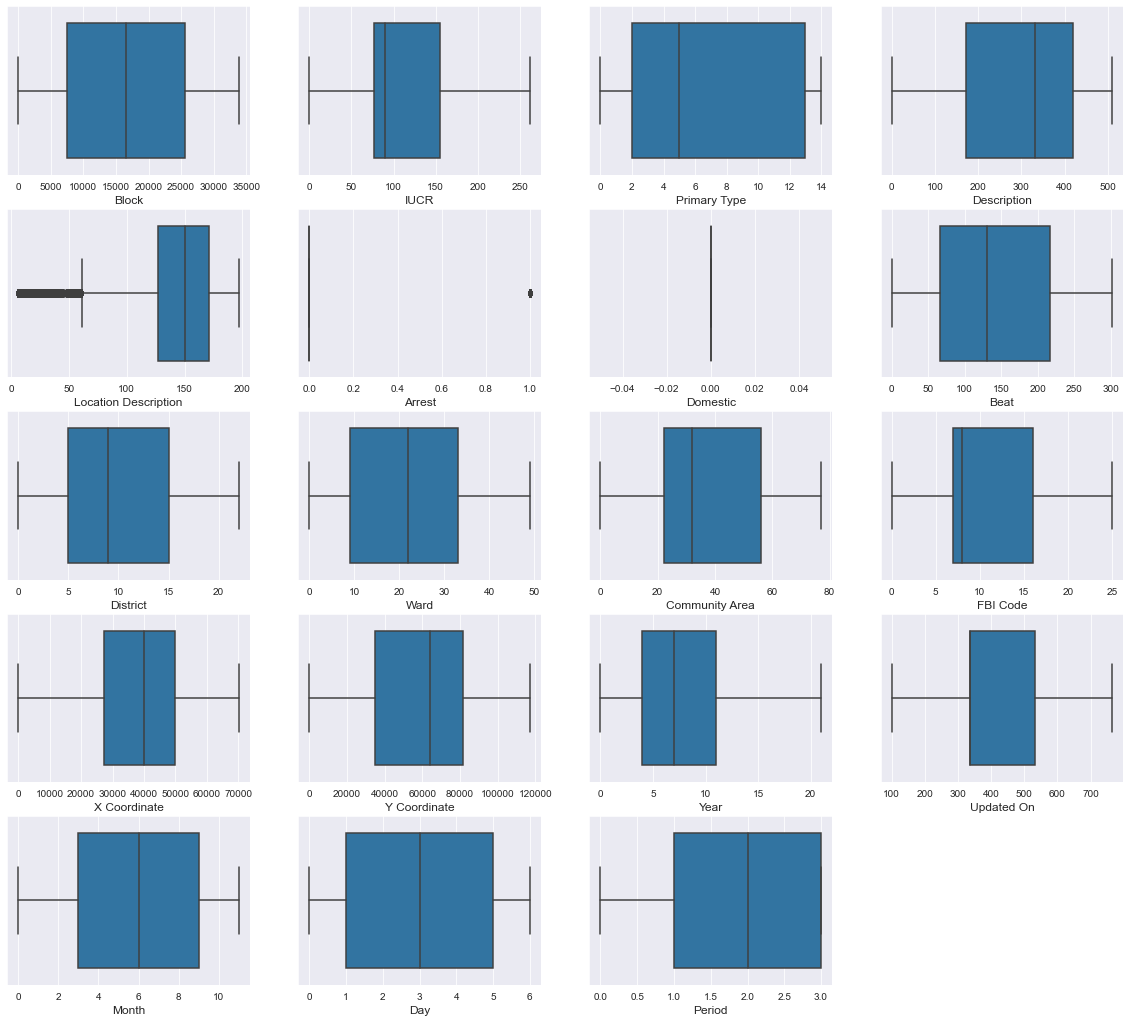

In [54]:
# Checking for outliers again
plt.figure(figsize = (20, 18))
for i in range (len(new_data.columns)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x = new_data.iloc[:, i])
    plt.xlabel(new_data.columns[i], size = 12)

### Predict crime types by day type and district.

In [175]:
# Moving the Outcome 'day', 'District', 'Primary Type' to the end of the dataframe.
cols_at_end = ['Day', 'District', 'Primary Type']
for col in cols_at_end:
    pt_data = new_data[[c for c in new_data if c not in cols_at_end] + [c for c in cols_at_end if c in new_data]]
pt_data.head(5)

,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Month,Period,Day,District,Primary Type
0,30275,156,460,171,0,0,45,9,46,16,67163,24442,7,531,5,0,2,3,3
2,25726,83,215,145,1,0,207,38,12,6,20541,110378,6,531,0,2,0,15,2
6,3532,19,431,66,0,0,183,28,25,3,13002,68248,5,531,10,1,2,13,12
7,19532,249,349,15,1,0,301,36,23,20,20935,79550,13,335,2,2,5,21,7
8,15528,101,136,171,0,0,174,25,23,8,28066,81332,9,335,6,2,6,12,6


#### feature selection

In [176]:
X = pt_data.iloc[:,0:15]
Y = pt_data.iloc[:,-3]

#X = X.to_numpy()
Y = Y.to_numpy()

test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[1.376e+06 1.252e+04 1.182e+04 1.002e+03 2.841e+02       nan 2.633e+04
 4.899e+03 7.759e+03 4.366e+02 3.215e+05 7.269e+06 1.523e+02 6.089e+02
 5.075e+01]
[[ 30275    156    460    171      0      0     45      9     46     16
   67163  24442      7    531      5]
 [ 25726     83    215    145      1      0    207     38     12      6
   20541 110378      6    531      0]
 [  3532     19    431     66      0      0    183     28     25      3
   13002  68248      5    531     10]
 [ 19532    249    349     15      1      0    301     36     23     20
   20935  79550     13    335      2]
 [ 15528    101    136    171      0      0    174     25     23      8
   28066  81332      9    335      6]]


In [177]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['input', 'score']

feature_scores.sort_values(by=['score'], ascending=False)

,input,score
11,Y Coordinate,7.268838e+06
0,Block,1.375851e+06
10,X Coordinate,3.214569e+05
6,Beat,2.632515e+04
1,IUCR,1.252126e+04
2,Description,1.182069e+04
8,Community Area,7.758717e+03
7,Ward,4.898539e+03
3,Location Description,1.001833e+03
13,Updated On,6.088901e+02


In [178]:
pt_data.columns

Index(['Block', 'IUCR', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On',
       'Month', 'Period', 'Day', 'District', 'Primary Type'],
      dtype='object')

In [179]:
pt_df = pt_data[['Y Coordinate', 'Block', 'X Coordinate', 'Beat', 'IUCR', 'Description', 'Community Area', 'Ward', 
                 'Day', 'District', 'Primary Type']]
pt_df.head()

,Y Coordinate,Block,X Coordinate,Beat,IUCR,Description,Community Area,Ward,Day,District,Primary Type
0,24442,30275,67163,45,156,460,46,9,2,3,3
2,110378,25726,20541,207,83,215,12,38,0,15,2
6,68248,3532,13002,183,19,431,25,28,2,13,12
7,79550,19532,20935,301,249,349,23,36,5,21,7
8,81332,15528,28066,174,101,136,23,25,6,12,6


In [180]:
pt_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y Coordinate,1361835.0,59741.138811,29068.777764,0.0,34855.0,63892.0,81548.0,117134.0
Block,1361835.0,16477.980398,9935.066929,0.0,7445.0,16512.0,25544.0,33840.0
X Coordinate,1361835.0,38441.640680,15181.206805,0.0,27323.0,39911.0,49929.0,70172.0
Beat,1361835.0,141.919936,87.415674,0.0,66.0,131.0,217.0,302.0
IUCR,1361835.0,106.988900,58.767608,0.0,77.0,90.0,155.0,262.0
Description,1361835.0,288.752059,157.403893,0.0,171.0,332.0,419.0,510.0
Community Area,1361835.0,37.002983,21.758645,0.0,22.0,32.0,56.0,77.0
Ward,1361835.0,21.963031,14.133700,0.0,9.0,22.0,33.0,49.0
Day,1361835.0,2.985232,2.027717,0.0,1.0,3.0,5.0,6.0
District,1361835.0,9.826751,6.219582,0.0,5.0,9.0,15.0,22.0


#### Preprocessing

In [181]:
# Rescaling to remove varying scale.

array = pt_df.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,-3]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)

print(rescaledX)

[[0.209 0.895 0.957 ... 0.902 0.597 0.184]
 [0.942 0.76  0.293 ... 0.422 0.156 0.776]
 [0.583 0.104 0.185 ... 0.845 0.325 0.571]
 ...
 [0.648 0.102 0.698 ... 0.822 0.104 0.837]
 [0.649 0.051 0.685 ... 0.902 0.104 0.837]
 [0.701 0.244 0.461 ... 0.684 0.312 0.   ]]


In [182]:
rescaledXDF = pd.DataFrame(rescaledX, columns = ['Y Coordinate', 'Block', 'X Coordinate', 'Beat', 'IUCR', 
                                                 'Description', 'Community Area', 'Ward'])

rescaledXDF.head(5)

,Y Coordinate,Block,X Coordinate,Beat,IUCR,Description,Community Area,Ward
0,0.208667,0.894651,0.957120,0.149007,0.595420,0.901961,0.597403,0.183673
1,0.942322,0.760225,0.292724,0.685430,0.316794,0.421569,0.155844,0.775510
2,0.582649,0.104374,0.185288,0.605960,0.072519,0.845098,0.324675,0.571429
3,0.679137,0.577187,0.298338,0.996689,0.950382,0.684314,0.298701,0.734694
4,0.694350,0.458865,0.399960,0.576159,0.385496,0.266667,0.298701,0.510204


In [183]:
rescaledXDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Y Coordinate,1361835.0,0.510024,0.248167,0.0,0.297565,0.545461,0.696194,1.0
Block,1361835.0,0.486938,0.293589,0.0,0.220006,0.487943,0.754846,1.0
X Coordinate,1361835.0,0.547820,0.216343,0.0,0.389372,0.568760,0.711523,1.0
Beat,1361835.0,0.469934,0.289456,0.0,0.218543,0.433775,0.718543,1.0
IUCR,1361835.0,0.408355,0.224304,0.0,0.293893,0.343511,0.591603,1.0
Description,1361835.0,0.566181,0.308635,0.0,0.335294,0.650980,0.821569,1.0
Community Area,1361835.0,0.480558,0.282580,0.0,0.285714,0.415584,0.727273,1.0
Ward,1361835.0,0.448225,0.288443,0.0,0.183673,0.448980,0.673469,1.0


In [184]:
# Standardizing - this is to ensure we have almost a uniform standard deviation

scaler = StandardScaler().fit(rescaledX)
restandardX = scaler.transform(rescaledX)

print(restandardX)

[[-1.214  1.389  1.892 ...  1.088  0.413 -0.917]
 [ 1.742  0.931 -1.179 ... -0.469 -1.149  1.135]
 [ 0.293 -1.303 -1.676 ...  0.904 -0.552  0.427]
 ...
 [ 0.557 -1.312  0.696 ...  0.827 -1.333  1.347]
 [ 0.561 -1.483  0.633 ...  1.088 -1.333  1.347]
 [ 0.768 -0.829 -0.399 ...  0.383 -0.598 -1.554]]


In [185]:
restandardXDF = pd.DataFrame(restandardX, columns = ['Y Coordinate', 'Block', 'X Coordinate', 'Beat', 'IUCR', 
                                                     'Description', 'Community Area', 'Ward'])

restandardXDF.head(5)

,Y Coordinate,Block,X Coordinate,Beat,IUCR,Description,Community Area,Ward
0,-1.214332,1.388720,1.891903,-1.108725,0.833982,1.087953,0.413492,-0.917172
1,1.741968,0.930847,-1.179132,0.744490,-0.408200,-0.468553,-1.149106,1.134662
2,0.292646,-1.303060,-1.675733,0.469940,-1.497235,0.903713,-0.551642,0.427133
3,0.681448,0.307398,-1.153179,1.819812,2.416487,0.382760,-0.643560,0.993156
4,0.742751,-0.095619,-0.683453,0.366983,-0.101908,-0.970447,-0.643560,0.214874


In [186]:
restandardXDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Y Coordinate,1361835.0,3.078902e-16,1.0,-2.055166,-0.856113,0.142795,0.750182,1.974382
Block,1361835.0,-1.486271e-16,1.0,-1.658568,-0.909202,0.003424,0.912528,1.747550
X Coordinate,1361835.0,-1.051798e-15,1.0,-2.532187,-0.732395,0.096788,0.756683,2.090109
Beat,1361835.0,5.295646e-16,1.0,-1.623507,-0.868494,-0.124920,0.858886,1.831252
IUCR,1361835.0,-8.823860e-16,1.0,-1.820543,-0.510297,-0.289086,0.816966,2.637697
Description,1361835.0,-2.088409e-15,1.0,-1.834466,-0.748089,0.274758,0.827476,1.405607
Community Area,1361835.0,4.965863e-16,1.0,-1.700611,-0.689519,-0.229931,0.873079,1.838213
Ward,1361835.0,-4.924496e-16,1.0,-1.553948,-0.917172,0.002616,0.780898,1.912944


In [187]:
# Normalizing

scaler = Normalizer().fit(restandardXDF)
NormalizedX = scaler.transform(restandardXDF)

print(NormalizedX)

[[-0.364  0.417  0.568 ...  0.327  0.124 -0.275]
 [ 0.586  0.313 -0.397 ... -0.158 -0.386  0.382]
 [ 0.101 -0.451 -0.58  ...  0.313 -0.191  0.148]
 ...
 [ 0.198 -0.465  0.247 ...  0.293 -0.473  0.478]
 [ 0.183 -0.483  0.206 ...  0.354 -0.434  0.438]
 [ 0.238 -0.257 -0.124 ...  0.119 -0.185 -0.482]]


In [188]:
NormalizedXDF = pd.DataFrame(NormalizedX, columns = ['Y Coordinate', 'Block', 'X Coordinate', 'Beat', 'IUCR', 
                                                     'Description', 'Community Area', 'Ward'])

NormalizedXDF.head(5)

,Y Coordinate,Block,X Coordinate,Beat,IUCR,Description,Community Area,Ward
0,-0.364432,0.416767,0.567777,-0.332738,0.250285,0.326504,0.124092,-0.275251
1,0.585900,0.313084,-0.396594,0.250404,-0.137295,-0.157595,-0.386495,0.381636
2,0.101228,-0.450735,-0.579644,0.162554,-0.517901,0.312599,-0.190816,0.147747
3,0.192077,0.086645,-0.325041,0.512942,0.681124,0.107887,-0.181397,0.279936
4,0.462856,-0.059586,-0.425904,0.228691,-0.063506,-0.604748,-0.401044,0.133902


In [189]:
NormalizedXDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Y Coordinate,1361835.0,0.004452,0.334897,-0.739240,-0.308714,0.074355,0.294789,0.668865
Block,1361835.0,-0.019723,0.358081,-0.907805,-0.352370,0.001586,0.317017,0.627134
X Coordinate,1361835.0,-0.020606,0.354764,-0.891699,-0.326838,0.036617,0.260759,0.712901
Beat,1361835.0,-0.011383,0.338896,-0.809683,-0.295679,-0.059150,0.310226,0.810241
IUCR,1361835.0,-0.013429,0.348223,-0.924355,-0.216071,-0.092895,0.259013,0.975140
Description,1361835.0,0.007379,0.376555,-0.951310,-0.310997,0.111298,0.328188,0.908408
Community Area,1361835.0,-0.001156,0.363132,-0.665480,-0.290577,-0.080378,0.375901,0.815958
Ward,1361835.0,-0.014473,0.350126,-0.868031,-0.314624,0.000885,0.281371,0.664709


In [190]:
#add 'day', 'District', 'Primary Type' array as new column...

NormalizedXDF['Day', 'District', 'Primary Type'] = Y.tolist()

NormalizedXDF.head(5)

,Y Coordinate,Block,X Coordinate,Beat,IUCR,Description,Community Area,Ward,"(Day, District, Primary Type)"
0,-0.364432,0.416767,0.567777,-0.332738,0.250285,0.326504,0.124092,-0.275251,2
1,0.585900,0.313084,-0.396594,0.250404,-0.137295,-0.157595,-0.386495,0.381636,0
2,0.101228,-0.450735,-0.579644,0.162554,-0.517901,0.312599,-0.190816,0.147747,2
3,0.192077,0.086645,-0.325041,0.512942,0.681124,0.107887,-0.181397,0.279936,5
4,0.462856,-0.059586,-0.425904,0.228691,-0.063506,-0.604748,-0.401044,0.133902,6


In [191]:
NormalizedXDF.shape

(1361835, 9)

In [192]:
# sample with seed
rpt_data = NormalizedXDF.sample(n=40000, random_state=5)
rpt_data.head(5)

,Y Coordinate,Block,X Coordinate,Beat,IUCR,Description,Community Area,Ward,"(Day, District, Primary Type)"
176447,-0.377629,0.424496,-0.060122,-0.271859,-0.472209,-0.388981,0.462516,-0.107096,6
52370,-0.544934,0.517443,0.424571,-0.329893,-0.043117,-0.134509,0.204036,-0.290907,1
983158,-0.202701,0.207004,-0.640116,-0.289225,-0.050600,-0.481847,0.433502,0.001299,3
446948,0.482712,0.221171,0.018756,0.340754,0.103316,-0.216176,0.531191,0.511895,6
1275883,-0.512564,0.489219,0.062466,0.419621,0.093622,-0.131487,0.533450,-0.085654,1


In [193]:
rpt_data.shape

(40000, 9)

In [194]:
X = rpt_data.iloc[:, :-1]
X.head()

,Y Coordinate,Block,X Coordinate,Beat,IUCR,Description,Community Area,Ward
176447,-0.377629,0.424496,-0.060122,-0.271859,-0.472209,-0.388981,0.462516,-0.107096
52370,-0.544934,0.517443,0.424571,-0.329893,-0.043117,-0.134509,0.204036,-0.290907
983158,-0.202701,0.207004,-0.640116,-0.289225,-0.050600,-0.481847,0.433502,0.001299
446948,0.482712,0.221171,0.018756,0.340754,0.103316,-0.216176,0.531191,0.511895
1275883,-0.512564,0.489219,0.062466,0.419621,0.093622,-0.131487,0.533450,-0.085654


In [195]:
Y = rpt_data.iloc[:, -1]
Y.head()

176447     6
52370      1
983158     3
446948     6
1275883    1
Name: (Day, District, Primary Type), dtype: int64

#### data balancing

In [196]:
sm = SMOTEENN(random_state=101)
x,y = sm.fit_resample(X,Y)

### Building models

In [197]:
#Building Models

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 0)

### Algorithms

In [201]:
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    cla = model
    cla.fit(xtrain, ytrain)
    
    predicted = cla.predict(xtrain)
    tr_auc = accuracy_score(predicted, ytrain)*100
    #     print("Print accuracy on Training data is {}".format(tr_auc))
    
    predicted = cla.predict(xtest)
    te_auc = accuracy_score(predicted, ytest)*100

    Recall = recall_score(predicted, ytest, average = 'micro')
    
    Precision = precision_score(predicted, ytest, average = 'micro')
    
    F1 = f1_score(predicted, ytest, average = 'micro')
    
    MSE = mean_squared_error(predicted, ytest)
    
    d['Name'].append(name)
    d['Training ACU'].append(tr_auc)
    d['Testing ACU'].append(te_auc)
    d['Recall'].append(Recall)
    d['Precision'].append(Precision)
    d['F1_Score'].append(F1)
    d['MSE'].append(MSE)
    
    print("**********"*5)
    print()
    return d

In [202]:
d = {'Name' : [], 'Training ACU': [], 'Testing ACU': [], 'Recall': [], 'Precision': [], 'F1_Score': [], 'MSE': []}
models = [ [KNeighborsClassifier(n_neighbors=1), 'KNeaarest Neighbor'], [RandomForestClassifier(), 'Random Forest'], 
          [DecisionTreeClassifier(), 'Decision Tree'], [CatBoostClassifier(), 'CatBoost'], [XGBClassifier(), 'xgboost'],
          [GaussianNB(), 'Naive Bayes'], [SVC(), 'Support Vector Machine'], [LGBMClassifier(), 'LGBM'], 
          [LinearDiscriminantAnalysis(), 'LDA'] ]

for model in models:
    d = Models(model[0], model[1], d)

acu_data = pd.DataFrame(data = d)

Working on KNeaarest Neighbor model
**************************************************

Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on CatBoost model
Learning rate set to 0.075183
0:	learn: 1.9106863	total: 26.8ms	remaining: 26.7s
1:	learn: 1.8774518	total: 53.2ms	remaining: 26.6s
2:	learn: 1.8417434	total: 83.2ms	remaining: 27.6s
3:	learn: 1.8148431	total: 109ms	remaining: 27.1s
4:	learn: 1.7966966	total: 133ms	remaining: 26.5s
5:	learn: 1.7669644	total: 152ms	remaining: 25.2s
6:	learn: 1.7395329	total: 171ms	remaining: 24.2s
7:	learn: 1.7169725	total: 192ms	remaining: 23.8s
8:	learn: 1.6905234	total: 211ms	remaining: 23.3s
9:	learn: 1.6694563	total: 230ms	remaining: 22.8s
10:	learn: 1.6490556	total: 248ms	remaining: 22.3s
11:	learn: 1.6296544	total: 267ms	remaining: 22s
12:	learn: 1.6111576	total: 286ms	remaining: 21.7s
13:	learn: 1.5926306	total: 308ms	re

161:	learn: 0.6335365	total: 3.09s	remaining: 16s
162:	learn: 0.6292706	total: 3.11s	remaining: 16s
163:	learn: 0.6278157	total: 3.12s	remaining: 15.9s
164:	learn: 0.6256156	total: 3.14s	remaining: 15.9s
165:	learn: 0.6251611	total: 3.15s	remaining: 15.8s
166:	learn: 0.6237699	total: 3.17s	remaining: 15.8s
167:	learn: 0.6207735	total: 3.18s	remaining: 15.8s
168:	learn: 0.6176486	total: 3.2s	remaining: 15.7s
169:	learn: 0.6140095	total: 3.21s	remaining: 15.7s
170:	learn: 0.6107397	total: 3.23s	remaining: 15.6s
171:	learn: 0.6079869	total: 3.24s	remaining: 15.6s
172:	learn: 0.6057021	total: 3.26s	remaining: 15.6s
173:	learn: 0.6037269	total: 3.27s	remaining: 15.5s
174:	learn: 0.6004455	total: 3.29s	remaining: 15.5s
175:	learn: 0.5993434	total: 3.3s	remaining: 15.5s
176:	learn: 0.5969605	total: 3.32s	remaining: 15.4s
177:	learn: 0.5944374	total: 3.33s	remaining: 15.4s
178:	learn: 0.5921347	total: 3.35s	remaining: 15.4s
179:	learn: 0.5887515	total: 3.36s	remaining: 15.3s
180:	learn: 0.5875

325:	learn: 0.3668661	total: 5.95s	remaining: 12.3s
326:	learn: 0.3656430	total: 5.96s	remaining: 12.3s
327:	learn: 0.3644063	total: 5.98s	remaining: 12.3s
328:	learn: 0.3625733	total: 6s	remaining: 12.2s
329:	learn: 0.3618996	total: 6.01s	remaining: 12.2s
330:	learn: 0.3608918	total: 6.03s	remaining: 12.2s
331:	learn: 0.3599201	total: 6.04s	remaining: 12.2s
332:	learn: 0.3586532	total: 6.06s	remaining: 12.1s
333:	learn: 0.3579836	total: 6.08s	remaining: 12.1s
334:	learn: 0.3572200	total: 6.09s	remaining: 12.1s
335:	learn: 0.3553790	total: 6.11s	remaining: 12.1s
336:	learn: 0.3539517	total: 6.13s	remaining: 12.1s
337:	learn: 0.3531582	total: 6.15s	remaining: 12s
338:	learn: 0.3515226	total: 6.16s	remaining: 12s
339:	learn: 0.3508068	total: 6.18s	remaining: 12s
340:	learn: 0.3496603	total: 6.2s	remaining: 12s
341:	learn: 0.3485421	total: 6.21s	remaining: 12s
342:	learn: 0.3476826	total: 6.23s	remaining: 11.9s
343:	learn: 0.3463745	total: 6.25s	remaining: 11.9s
344:	learn: 0.3453256	tota

491:	learn: 0.2424037	total: 8.82s	remaining: 9.1s
492:	learn: 0.2418177	total: 8.84s	remaining: 9.09s
493:	learn: 0.2410159	total: 8.85s	remaining: 9.07s
494:	learn: 0.2407176	total: 8.87s	remaining: 9.05s
495:	learn: 0.2402983	total: 8.89s	remaining: 9.03s
496:	learn: 0.2397894	total: 8.9s	remaining: 9.01s
497:	learn: 0.2392270	total: 8.92s	remaining: 8.99s
498:	learn: 0.2384719	total: 8.94s	remaining: 8.97s
499:	learn: 0.2378432	total: 8.95s	remaining: 8.95s
500:	learn: 0.2371470	total: 8.97s	remaining: 8.93s
501:	learn: 0.2364831	total: 8.98s	remaining: 8.91s
502:	learn: 0.2361727	total: 9s	remaining: 8.89s
503:	learn: 0.2357308	total: 9.02s	remaining: 8.87s
504:	learn: 0.2354149	total: 9.03s	remaining: 8.86s
505:	learn: 0.2349583	total: 9.05s	remaining: 8.84s
506:	learn: 0.2342850	total: 9.07s	remaining: 8.82s
507:	learn: 0.2337192	total: 9.08s	remaining: 8.8s
508:	learn: 0.2332959	total: 9.1s	remaining: 8.78s
509:	learn: 0.2324811	total: 9.11s	remaining: 8.76s
510:	learn: 0.23214

658:	learn: 0.1730429	total: 11.2s	remaining: 5.82s
659:	learn: 0.1726745	total: 11.3s	remaining: 5.8s
660:	learn: 0.1722775	total: 11.3s	remaining: 5.79s
661:	learn: 0.1718485	total: 11.3s	remaining: 5.77s
662:	learn: 0.1714505	total: 11.3s	remaining: 5.75s
663:	learn: 0.1711543	total: 11.3s	remaining: 5.74s
664:	learn: 0.1709217	total: 11.4s	remaining: 5.72s
665:	learn: 0.1708434	total: 11.4s	remaining: 5.7s
666:	learn: 0.1704976	total: 11.4s	remaining: 5.69s
667:	learn: 0.1703646	total: 11.4s	remaining: 5.67s
668:	learn: 0.1701047	total: 11.4s	remaining: 5.65s
669:	learn: 0.1696532	total: 11.4s	remaining: 5.64s
670:	learn: 0.1694438	total: 11.5s	remaining: 5.62s
671:	learn: 0.1692201	total: 11.5s	remaining: 5.6s
672:	learn: 0.1689548	total: 11.5s	remaining: 5.58s
673:	learn: 0.1685605	total: 11.5s	remaining: 5.56s
674:	learn: 0.1682860	total: 11.5s	remaining: 5.55s
675:	learn: 0.1679920	total: 11.5s	remaining: 5.53s
676:	learn: 0.1675909	total: 11.5s	remaining: 5.51s
677:	learn: 0.1

827:	learn: 0.1301143	total: 14.3s	remaining: 2.97s
828:	learn: 0.1299376	total: 14.3s	remaining: 2.96s
829:	learn: 0.1297854	total: 14.4s	remaining: 2.94s
830:	learn: 0.1296268	total: 14.4s	remaining: 2.92s
831:	learn: 0.1294036	total: 14.4s	remaining: 2.9s
832:	learn: 0.1292246	total: 14.4s	remaining: 2.89s
833:	learn: 0.1288604	total: 14.4s	remaining: 2.87s
834:	learn: 0.1287563	total: 14.4s	remaining: 2.85s
835:	learn: 0.1286667	total: 14.4s	remaining: 2.83s
836:	learn: 0.1285152	total: 14.5s	remaining: 2.82s
837:	learn: 0.1283275	total: 14.5s	remaining: 2.8s
838:	learn: 0.1281945	total: 14.5s	remaining: 2.78s
839:	learn: 0.1280704	total: 14.5s	remaining: 2.76s
840:	learn: 0.1279465	total: 14.5s	remaining: 2.75s
841:	learn: 0.1277661	total: 14.5s	remaining: 2.73s
842:	learn: 0.1274843	total: 14.6s	remaining: 2.71s
843:	learn: 0.1272483	total: 14.6s	remaining: 2.69s
844:	learn: 0.1271177	total: 14.6s	remaining: 2.68s
845:	learn: 0.1269943	total: 14.6s	remaining: 2.66s
846:	learn: 0.

988:	learn: 0.1037471	total: 17s	remaining: 189ms
989:	learn: 0.1036271	total: 17s	remaining: 171ms
990:	learn: 0.1034830	total: 17s	remaining: 154ms
991:	learn: 0.1033367	total: 17s	remaining: 137ms
992:	learn: 0.1031779	total: 17s	remaining: 120ms
993:	learn: 0.1030410	total: 17s	remaining: 103ms
994:	learn: 0.1029499	total: 17s	remaining: 85.7ms
995:	learn: 0.1027355	total: 17.1s	remaining: 68.5ms
996:	learn: 0.1026297	total: 17.1s	remaining: 51.4ms
997:	learn: 0.1024987	total: 17.1s	remaining: 34.2ms
998:	learn: 0.1023774	total: 17.1s	remaining: 17.1ms
999:	learn: 0.1022522	total: 17.1s	remaining: 0us
**************************************************

Working on xgboost model
**************************************************

Working on Naive Bayes model
**************************************************

Working on Support Vector Machine model
**************************************************

Working on LGBM model
**************************************************

Working on 

In [203]:
acu_data

,Name,Training ACU,Testing ACU,Recall,Precision,F1_Score,MSE
0,KNeaarest Neighbor,100.000000,71.739130,0.717391,0.717391,0.717391,2.510870
1,Random Forest,100.000000,69.565217,0.695652,0.695652,0.695652,1.478261
2,Decision Tree,100.000000,63.043478,0.630435,0.630435,0.630435,1.956522
3,CatBoost,100.000000,61.956522,0.619565,0.619565,0.619565,2.108696
4,xgboost,100.000000,63.043478,0.630435,0.630435,0.630435,2.413043
5,Naive Bayes,33.242507,22.826087,0.228261,0.228261,0.228261,4.065217
6,Support Vector Machine,51.498638,38.043478,0.380435,0.380435,0.380435,2.869565
7,LGBM,100.000000,70.652174,0.706522,0.706522,0.706522,1.565217
8,LDA,35.422343,29.347826,0.293478,0.293478,0.293478,3.076087


### Model Evaluation
#### Confusion Matrix

In [81]:
def Matrix(model, name, d):
    print("Confusion Matrix for {} model".format(name))
    print()
    
    y_pred = cross_val_predict(model, x, y, cv=3)
    conf_mat = confusion_matrix(y, y_pred)
    print(conf_mat)
    
    cm = conf_mat
    labls =['N','Y']
    sns.set(font_scale = 1)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(10,6))
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labls, yticklabels=labls)
    plt.ylabel('Actual COF ', size = 10)
    plt.xlabel('Predicted COF', size = 10)
    plt.title('Confusion Matrix of Predictions', size = 12)

    # print('confusion matrix for KNeaarest Neighbor')
    plt.show(block=False)
    
    d['Name'].append(name)
    
    print("**********"*7)
    print()
    print()
    return d

Confusion Matrix for KNeaarest Neighbor model

[[ 18   0   1   1   1   1   3]
 [  0  39   5   3   2   6   1]
 [  0   3  34   5   5   6   4]
 [  0   4   4 122   0   6   2]
 [  0   2   4   8  47   4   8]
 [  1   5   8   7   5  33   3]
 [  3   2   1   5   7   4  26]]


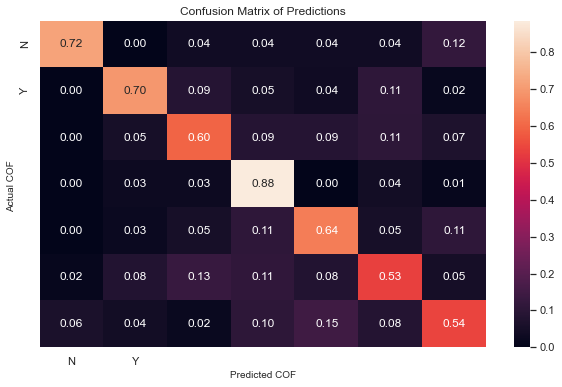

**********************************************************************


Confusion Matrix for Random Forest model

[[ 17   0   1   4   1   1   1]
 [  2  36   7   5   0   2   4]
 [  1   7  32   8   4   2   3]
 [  1   6   4 123   0   3   1]
 [  0   1   2  15  45   6   4]
 [  2   2   2  16   5  32   3]
 [  1   5   1  10   5   1  25]]


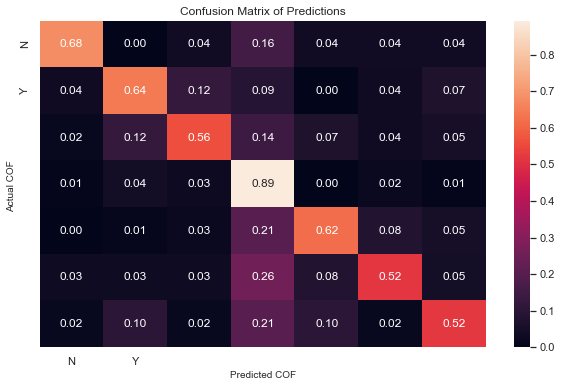

**********************************************************************


Confusion Matrix for Decision Tree model

[[ 14   0   2   1   3   4   1]
 [  2  35   4   4   6   3   2]
 [  2   3  33   6   5   7   1]
 [  5   3   5 104   6  10   5]
 [  2   3   4  10  42   6   6]
 [  0   3   2  11   6  34   6]
 [  0   5   3   6   8   1  25]]


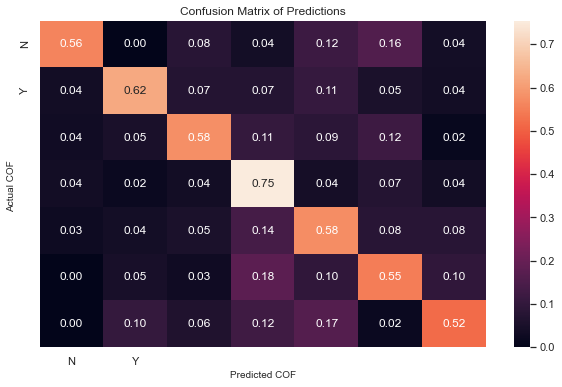

**********************************************************************


Confusion Matrix for Naive Bayes model

[[ 6  2  2 11  1  1  2]
 [ 5  5  1 24  7  0 14]
 [ 5  0 11 17  9  5 10]
 [ 5 14 12 64 26  0 17]
 [ 2  3  0 30 15  6 17]
 [ 3  6  4 19 20  2  8]
 [ 2  5  4 13  8  6 10]]


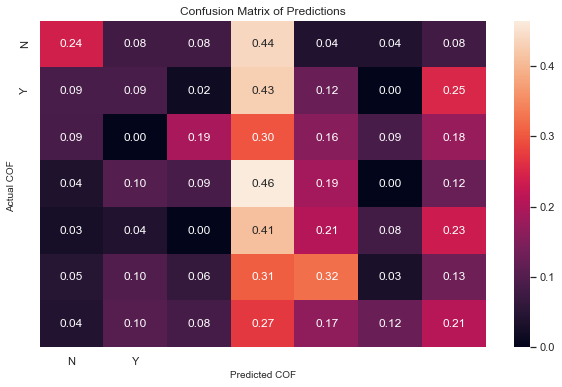

**********************************************************************


Confusion Matrix for Support Vector Machine model

[[  0   2   3  15   2   3   0]
 [  0  16   4  25   6   3   2]
 [  1   2  16  20  12   6   0]
 [  0  10  10 105   8   4   1]
 [  0   2   3  26  24  12   6]
 [  0   0   2  29  11  12   8]
 [  0   5   5  24   1   8   5]]


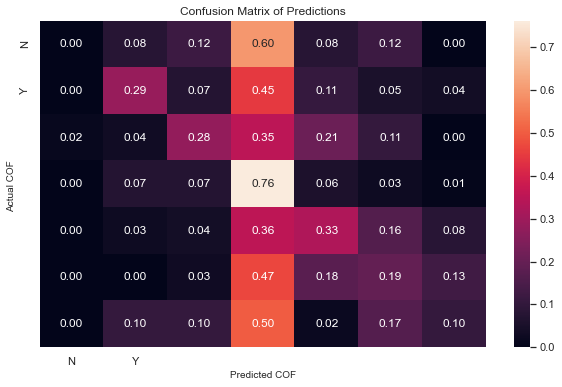

**********************************************************************




In [82]:
d = {'Name' : [], 'KNeaarest Neighbor': [], 'Random Forest': [], 'Decision Tree': [], 'Naive Bayes': [], 
     'Support Vector Machine': []}

models = [ [KNeighborsClassifier(n_neighbors=1), 'KNeaarest Neighbor'], [RandomForestClassifier(), 'Random Forest'], 
          [DecisionTreeClassifier(), 'Decision Tree'], [GaussianNB(), 'Naive Bayes'], [SVC(), 'Support Vector Machine'] ]

for model in models:
    d = Matrix(model[0], model[1], d)

# mat_data = pd.DataFrame(data = d)

### Hypertuning

In [88]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn_2 = KNeighborsClassifier(n_neighbors = i).fit(xtrain,ytrain)
    yhat= knn_2.predict(xtest)
    mean_acc[i-1] = metrics.accuracy_score(ytest, yhat)

mean_acc

array([0.717, 0.641, 0.565, 0.446, 0.413, 0.38 , 0.359, 0.326, 0.326,
       0.315, 0.326, 0.315, 0.283, 0.304, 0.261, 0.25 , 0.304, 0.283,
       0.283, 0.283])

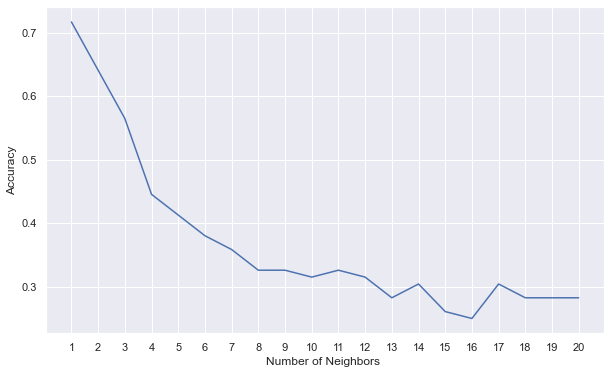

In [89]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

### Predict violent and non-violent crimes by Day Period and Ward

In [204]:
# Moving the Outcome 'period', 'ward', 'Domestic' to the end of the dataframe.
cols_at_end = ['Period', 'Ward', 'Domestic']
for col in cols_at_end:
    dom_data = new_data[[c for c in new_data if c not in cols_at_end] + [c for c in cols_at_end if c in new_data]]
dom_data.head(5)

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Beat,District,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Month,Day,Period,Ward,Domestic
0,30275,156,3,460,171,0,45,3,46,16,67163,24442,7,531,5,2,0,9,0
2,25726,83,2,215,145,1,207,15,12,6,20541,110378,6,531,0,0,2,38,0
6,3532,19,12,431,66,0,183,13,25,3,13002,68248,5,531,10,2,1,28,0
7,19532,249,7,349,15,1,301,21,23,20,20935,79550,13,335,2,5,2,36,0
8,15528,101,6,136,171,0,174,12,23,8,28066,81332,9,335,6,6,2,25,0


#### feature selection

In [205]:
# feature selection

X = dom_data.iloc[:,0:15]
Y = dom_data.iloc[:,-3]

Y = Y.to_numpy()

# feature extraction
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[2.772e+06 1.915e+05 4.379e+03 1.741e+05 9.015e+04 5.853e+03 4.361e+04
 3.994e+03 1.437e+03 2.107e+04 3.899e+06 2.747e+06 2.711e+03 9.891e+03
 5.649e-01]
[[ 30275    156      3    460    171      0     45      3     46     16
   67163  24442      7    531      5]
 [ 25726     83      2    215    145      1    207     15     12      6
   20541 110378      6    531      0]
 [  3532     19     12    431     66      0    183     13     25      3
   13002  68248      5    531     10]
 [ 19532    249      7    349     15      1    301     21     23     20
   20935  79550     13    335      2]
 [ 15528    101      6    136    171      0    174     12     23      8
   28066  81332      9    335      6]]


In [206]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['input', 'score']

feature_scores.sort_values(by=['score'], ascending=False)

,input,score
10,X Coordinate,3.899095e+06
0,Block,2.771983e+06
11,Y Coordinate,2.746979e+06
1,IUCR,1.915486e+05
3,Description,1.741169e+05
4,Location Description,9.015396e+04
6,Beat,4.360739e+04
9,FBI Code,2.106655e+04
13,Updated On,9.891221e+03
5,Arrest,5.853043e+03


In [207]:
new_data.columns

Index(['Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Month', 'Day', 'Period'],
      dtype='object')

In [208]:
data_df = new_data[['X Coordinate', 'Block', 'Y Coordinate', 'IUCR', 'Description', 'Location Description', 'Beat', 
                    'FBI Code', 'Period', 'Ward', 'Domestic']]
data_df.head(5)

,X Coordinate,Block,Y Coordinate,IUCR,Description,Location Description,Beat,FBI Code,Period,Ward,Domestic
0,67163,30275,24442,156,460,171,45,16,0,9,0
2,20541,25726,110378,83,215,145,207,6,2,38,0
6,13002,3532,68248,19,431,66,183,3,1,28,0
7,20935,19532,79550,249,349,15,301,20,2,36,0
8,28066,15528,81332,101,136,171,174,8,2,25,0


In [209]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
X Coordinate,1361835.0,38441.640680,15181.206805,0.0,27323.0,39911.0,49929.0,70172.0
Block,1361835.0,16477.980398,9935.066929,0.0,7445.0,16512.0,25544.0,33840.0
Y Coordinate,1361835.0,59741.138811,29068.777764,0.0,34855.0,63892.0,81548.0,117134.0
IUCR,1361835.0,106.988900,58.767608,0.0,77.0,90.0,155.0,262.0
Description,1361835.0,288.752059,157.403893,0.0,171.0,332.0,419.0,510.0
Location Description,1361835.0,131.889711,52.592047,6.0,127.0,150.0,171.0,197.0
Beat,1361835.0,141.919936,87.415674,0.0,66.0,131.0,217.0,302.0
FBI Code,1361835.0,10.717514,5.664073,0.0,7.0,8.0,16.0,25.0
Period,1361835.0,1.698701,1.085417,0.0,1.0,2.0,3.0,3.0
Ward,1361835.0,21.963031,14.133700,0.0,9.0,22.0,33.0,49.0


#### preprocessing

In [210]:
# Rescaling to remove varying scale.

array = data_df.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,-3]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)

print(rescaledX)

[[0.957 0.895 0.209 ... 0.864 0.149 0.64 ]
 [0.293 0.76  0.942 ... 0.728 0.685 0.24 ]
 [0.185 0.104 0.583 ... 0.314 0.606 0.12 ]
 ...
 [0.698 0.102 0.648 ... 0.283 0.745 0.36 ]
 [0.685 0.051 0.649 ... 0.675 0.742 1.   ]
 [0.461 0.244 0.701 ... 0.864 0.596 0.8  ]]


In [211]:
rescaledXDF = pd.DataFrame(rescaledX, columns = ['X Coordinate', 'Block', 'Y Coordinate', 'IUCR', 'Description', 
                                                 'Location Description', 'Beat', 'FBI Code'])

rescaledXDF.head(5)

,X Coordinate,Block,Y Coordinate,IUCR,Description,Location Description,Beat,FBI Code
0,0.957120,0.894651,0.208667,0.595420,0.901961,0.863874,0.149007,0.64
1,0.292724,0.760225,0.942322,0.316794,0.421569,0.727749,0.685430,0.24
2,0.185288,0.104374,0.582649,0.072519,0.845098,0.314136,0.605960,0.12
3,0.298338,0.577187,0.679137,0.950382,0.684314,0.047120,0.996689,0.80
4,0.399960,0.458865,0.694350,0.385496,0.266667,0.863874,0.576159,0.32


In [212]:
rescaledXDF.describe().T

,count,mean,std,min,25%,50%,75%,max
X Coordinate,1361835.0,0.547820,0.216343,0.0,0.389372,0.568760,0.711523,1.0
Block,1361835.0,0.486938,0.293589,0.0,0.220006,0.487943,0.754846,1.0
Y Coordinate,1361835.0,0.510024,0.248167,0.0,0.297565,0.545461,0.696194,1.0
IUCR,1361835.0,0.408355,0.224304,0.0,0.293893,0.343511,0.591603,1.0
Description,1361835.0,0.566181,0.308635,0.0,0.335294,0.650980,0.821569,1.0
Location Description,1361835.0,0.659108,0.275351,0.0,0.633508,0.753927,0.863874,1.0
Beat,1361835.0,0.469934,0.289456,0.0,0.218543,0.433775,0.718543,1.0
FBI Code,1361835.0,0.428701,0.226563,0.0,0.280000,0.320000,0.640000,1.0


In [213]:
# Standardizing - this is to ensure we have almost a uniform standard deviation

scaler = StandardScaler().fit(rescaledX)
restandardX = scaler.transform(rescaledX)

print(restandardX)

[[ 1.892  1.389 -1.214 ...  0.744 -1.109  0.933]
 [-1.179  0.931  1.742 ...  0.249  0.744 -0.833]
 [-1.676 -1.303  0.293 ... -1.253  0.47  -1.363]
 ...
 [ 0.696 -1.312  0.557 ... -1.367  0.95  -0.303]
 [ 0.633 -1.483  0.561 ...  0.059  0.939  2.522]
 [-0.399 -0.829  0.768 ...  0.744  0.436  1.639]]


In [214]:
restandardXDF = pd.DataFrame(restandardX, columns = ['X Coordinate', 'Block', 'Y Coordinate', 'IUCR', 'Description', 
                                                     'Location Description', 'Beat', 'FBI Code'])

restandardXDF.head(5)

,X Coordinate,Block,Y Coordinate,IUCR,Description,Location Description,Beat,FBI Code
0,1.891903,1.388720,-1.214332,0.833982,1.087953,0.743654,-1.108725,0.932631
1,-1.179132,0.930847,1.741968,-0.408200,-0.468553,0.249283,0.744490,-0.832884
2,-1.675733,-1.303060,0.292646,-1.497235,0.903713,-1.252846,0.469940,-1.362538
3,-1.153179,0.307398,0.681448,2.416487,0.382760,-2.222575,1.819812,1.638837
4,-0.683453,-0.095619,0.742751,-0.101908,-0.970447,0.743654,0.366983,-0.479781


In [215]:
restandardXDF.describe().T

,count,mean,std,min,25%,50%,75%,max
X Coordinate,1361835.0,-1.051798e-15,1.0,-2.532187,-0.732395,0.096788,0.756683,2.090109
Block,1361835.0,-1.486271e-16,1.0,-1.658568,-0.909202,0.003424,0.912528,1.747550
Y Coordinate,1361835.0,3.078902e-16,1.0,-2.055166,-0.856113,0.142795,0.750182,1.974382
IUCR,1361835.0,-8.823860e-16,1.0,-1.820543,-0.510297,-0.289086,0.816966,2.637697
Description,1361835.0,-2.088409e-15,1.0,-1.834466,-0.748089,0.274758,0.827476,1.405607
Location Description,1361835.0,7.873322e-16,1.0,-2.393703,-0.092974,0.344354,0.743654,1.238026
Beat,1361835.0,5.295646e-16,1.0,-1.623507,-0.868494,-0.124920,0.858886,1.831252
FBI Code,1361835.0,-4.416031e-16,1.0,-1.892193,-0.656332,-0.479781,0.932631,2.521594


In [216]:
# Normalizing

scaler = Normalizer().fit(restandardXDF)
NormalizedX = scaler.transform(restandardXDF)

print(NormalizedX)

[[ 0.558  0.409 -0.358 ...  0.219 -0.327  0.275]
 [-0.446  0.352  0.659 ...  0.094  0.282 -0.315]
 [-0.499 -0.388  0.087 ... -0.373  0.14  -0.405]
 ...
 [ 0.277 -0.522  0.222 ... -0.543  0.378 -0.121]
 [ 0.181 -0.424  0.161 ...  0.017  0.269  0.721]
 [-0.121 -0.252  0.233 ...  0.226  0.132  0.498]]


In [217]:
NormalizedXDF = pd.DataFrame(NormalizedX, columns = ['X Coordinate', 'Block', 'Y Coordinate', 'IUCR', 'Description', 
                                                     'Location Description', 'Beat', 'FBI Code'])

NormalizedXDF.head(5)

,X Coordinate,Block,Y Coordinate,IUCR,Description,Location Description,Beat,FBI Code
0,0.557560,0.409267,-0.357874,0.245781,0.320629,0.219161,-0.326751,0.274854
1,-0.446067,0.352140,0.658988,-0.154422,-0.177254,0.094304,0.281641,-0.315081
2,-0.498565,-0.387687,0.087068,-0.445458,0.268873,-0.372747,0.139817,-0.405383
3,-0.265876,0.070874,0.157114,0.557144,0.088249,-0.512436,0.419575,0.377849
4,-0.401478,-0.056169,0.436311,-0.059864,-0.570065,0.436842,0.215575,-0.281836


In [218]:
NormalizedXDF.describe().T

,count,mean,std,min,25%,50%,75%,max
X Coordinate,1361835.0,-0.013351,0.349296,-0.873054,-0.303741,0.038423,0.266488,0.766398
Block,1361835.0,-0.017175,0.365706,-0.905156,-0.348052,0.001693,0.316535,0.691665
Y Coordinate,1361835.0,0.010524,0.355791,-0.816393,-0.312341,0.062169,0.292172,0.819107
IUCR,1361835.0,-0.023576,0.332758,-0.788500,-0.221799,-0.097914,0.247023,0.911980
Description,1361835.0,0.002261,0.378846,-0.942725,-0.325688,0.111308,0.324188,0.866994
Location Description,1361835.0,0.026536,0.345576,-0.945529,-0.052480,0.156128,0.259532,0.832995
Beat,1361835.0,-0.002388,0.354756,-0.823835,-0.301820,-0.052958,0.326854,0.815869
FBI Code,1361835.0,-0.030137,0.339670,-0.765343,-0.281910,-0.164661,0.303112,0.951620


In [219]:
#add 'period', 'Ward', 'Domestic' array as new column...

NormalizedXDF['Period', 'Ward', 'Domestic'] = Y.tolist()

NormalizedXDF.head(5)

,X Coordinate,Block,Y Coordinate,IUCR,Description,Location Description,Beat,FBI Code,"(Period, Ward, Domestic)"
0,0.557560,0.409267,-0.357874,0.245781,0.320629,0.219161,-0.326751,0.274854,0
1,-0.446067,0.352140,0.658988,-0.154422,-0.177254,0.094304,0.281641,-0.315081,2
2,-0.498565,-0.387687,0.087068,-0.445458,0.268873,-0.372747,0.139817,-0.405383,1
3,-0.265876,0.070874,0.157114,0.557144,0.088249,-0.512436,0.419575,0.377849,2
4,-0.401478,-0.056169,0.436311,-0.059864,-0.570065,0.436842,0.215575,-0.281836,2


In [220]:
NormalizedXDF.shape

(1361835, 9)

In [221]:
# sample with seed
vnv_df = NormalizedXDF.sample(n=40000, random_state=5)
vnv_df.head(5)

,X Coordinate,Block,Y Coordinate,IUCR,Description,Location Description,Beat,FBI Code,"(Period, Ward, Domestic)"
176447,-0.060534,0.427406,-0.380218,-0.475447,-0.391648,0.199167,-0.273723,-0.418408,0
52370,0.443140,0.540074,-0.568767,-0.045003,-0.140392,-0.030779,-0.344322,-0.217279,2
983158,-0.638470,0.206472,-0.202180,-0.050469,-0.480608,0.368290,-0.288482,-0.237609,3
446948,0.027227,0.321061,0.700726,0.149977,-0.313811,0.104570,0.494653,0.169042,0
1275883,0.073158,0.572962,-0.600302,0.109648,-0.153995,0.089185,0.491451,0.144171,2


In [222]:
vnv_df.shape

(40000, 9)

In [223]:
X = vnv_df.iloc[:, :-1]
X.head()

,X Coordinate,Block,Y Coordinate,IUCR,Description,Location Description,Beat,FBI Code
176447,-0.060534,0.427406,-0.380218,-0.475447,-0.391648,0.199167,-0.273723,-0.418408
52370,0.443140,0.540074,-0.568767,-0.045003,-0.140392,-0.030779,-0.344322,-0.217279
983158,-0.638470,0.206472,-0.202180,-0.050469,-0.480608,0.368290,-0.288482,-0.237609
446948,0.027227,0.321061,0.700726,0.149977,-0.313811,0.104570,0.494653,0.169042
1275883,0.073158,0.572962,-0.600302,0.109648,-0.153995,0.089185,0.491451,0.144171


In [224]:
Y = vnv_df.iloc[:, -1]
Y.head()

176447     0
52370      2
983158     3
446948     0
1275883    2
Name: (Period, Ward, Domestic), dtype: int64

#### data balancing

In [225]:
sm = SMOTEENN(random_state=101)
x,y = sm.fit_resample(X,Y)

### Modeling

In [226]:
#Building Models

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 0)

### Algorithms

In [227]:
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    cla = model
    cla.fit(xtrain, ytrain)
    
    predicted = cla.predict(xtrain)
    tr_auc = accuracy_score(predicted, ytrain)*100
    #     print("Print accuracy on Training data is {}".format(tr_auc))
    
    predicted = cla.predict(xtest)
    te_auc = accuracy_score(predicted, ytest)*100

    Recall = recall_score(predicted, ytest, average = 'micro')
    
    Precision = precision_score(predicted, ytest, average = 'micro')
    
    F1 = f1_score(predicted, ytest, average = 'micro')
    
    MSE = mean_squared_error(predicted, ytest)
    
    d['Name'].append(name)
    d['Training ACU'].append(tr_auc)
    d['Testing ACU'].append(te_auc)
    d['Recall'].append(Recall)
    d['Precision'].append(Precision)
    d['F1_Score'].append(F1)
    d['MSE'].append(MSE)
    
    print("**********"*5)
    print()
    return d

In [228]:
d = {'Name' : [], 'Training ACU': [], 'Testing ACU': [], 'Recall': [], 'Precision': [], 'F1_Score': [], 'MSE': []}
models = [ [KNeighborsClassifier(n_neighbors=1), 'KNeaarest Neighbor'], [RandomForestClassifier(), 'Random Forest'], 
          [DecisionTreeClassifier(), 'Decision Tree'], [CatBoostClassifier(), 'CatBoost'], [XGBClassifier(), 'xgboost'],
          [GaussianNB(), 'Naive Bayes'], [SVC(), 'Support Vector Machine'], [LGBMClassifier(), 'LGBM'], 
          [LinearDiscriminantAnalysis(), 'LDA'] ]

for model in models:
    d = Models(model[0], model[1], d)

acu_data = pd.DataFrame(data = d)

Working on KNeaarest Neighbor model
**************************************************

Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on CatBoost model
Learning rate set to 0.087991
0:	learn: 1.3481329	total: 18.7ms	remaining: 18.7s
1:	learn: 1.3193520	total: 28.9ms	remaining: 14.4s
2:	learn: 1.2937976	total: 39.4ms	remaining: 13.1s
3:	learn: 1.2707497	total: 52.6ms	remaining: 13.1s
4:	learn: 1.2548202	total: 65.6ms	remaining: 13s
5:	learn: 1.2381186	total: 77.7ms	remaining: 12.9s
6:	learn: 1.2215694	total: 89.8ms	remaining: 12.7s
7:	learn: 1.2089353	total: 103ms	remaining: 12.7s
8:	learn: 1.1987184	total: 116ms	remaining: 12.8s
9:	learn: 1.1878036	total: 128ms	remaining: 12.7s
10:	learn: 1.1793508	total: 139ms	remaining: 12.5s
11:	learn: 1.1698636	total: 151ms	remaining: 12.5s
12:	learn: 1.1635548	total: 162ms	remaining: 12.3s
13:	learn: 1.1564628	total: 174m

166:	learn: 0.8682527	total: 2.25s	remaining: 11.2s
167:	learn: 0.8667346	total: 2.27s	remaining: 11.2s
168:	learn: 0.8650973	total: 2.28s	remaining: 11.2s
169:	learn: 0.8637329	total: 2.3s	remaining: 11.2s
170:	learn: 0.8621562	total: 2.31s	remaining: 11.2s
171:	learn: 0.8606544	total: 2.32s	remaining: 11.2s
172:	learn: 0.8584891	total: 2.34s	remaining: 11.2s
173:	learn: 0.8568957	total: 2.35s	remaining: 11.2s
174:	learn: 0.8557303	total: 2.37s	remaining: 11.2s
175:	learn: 0.8541608	total: 2.38s	remaining: 11.1s
176:	learn: 0.8531397	total: 2.39s	remaining: 11.1s
177:	learn: 0.8518840	total: 2.41s	remaining: 11.1s
178:	learn: 0.8504809	total: 2.42s	remaining: 11.1s
179:	learn: 0.8487111	total: 2.43s	remaining: 11.1s
180:	learn: 0.8468654	total: 2.45s	remaining: 11.1s
181:	learn: 0.8457902	total: 2.47s	remaining: 11.1s
182:	learn: 0.8443282	total: 2.48s	remaining: 11.1s
183:	learn: 0.8433200	total: 2.5s	remaining: 11.1s
184:	learn: 0.8425642	total: 2.51s	remaining: 11.1s
185:	learn: 0.

334:	learn: 0.7053167	total: 4.67s	remaining: 9.26s
335:	learn: 0.7042814	total: 4.68s	remaining: 9.25s
336:	learn: 0.7037647	total: 4.7s	remaining: 9.25s
337:	learn: 0.7029034	total: 4.72s	remaining: 9.24s
338:	learn: 0.7024910	total: 4.73s	remaining: 9.23s
339:	learn: 0.7013941	total: 4.75s	remaining: 9.21s
340:	learn: 0.7008801	total: 4.76s	remaining: 9.2s
341:	learn: 0.7001742	total: 4.78s	remaining: 9.19s
342:	learn: 0.6992495	total: 4.79s	remaining: 9.18s
343:	learn: 0.6984609	total: 4.81s	remaining: 9.17s
344:	learn: 0.6972126	total: 4.83s	remaining: 9.16s
345:	learn: 0.6963289	total: 4.84s	remaining: 9.15s
346:	learn: 0.6955322	total: 4.86s	remaining: 9.15s
347:	learn: 0.6946235	total: 4.88s	remaining: 9.14s
348:	learn: 0.6940030	total: 4.89s	remaining: 9.13s
349:	learn: 0.6932020	total: 4.91s	remaining: 9.12s
350:	learn: 0.6924028	total: 4.93s	remaining: 9.11s
351:	learn: 0.6915295	total: 4.94s	remaining: 9.1s
352:	learn: 0.6909626	total: 4.96s	remaining: 9.09s
353:	learn: 0.6

499:	learn: 0.5974483	total: 7.09s	remaining: 7.09s
500:	learn: 0.5969258	total: 7.1s	remaining: 7.07s
501:	learn: 0.5963316	total: 7.11s	remaining: 7.05s
502:	learn: 0.5958628	total: 7.12s	remaining: 7.04s
503:	learn: 0.5954287	total: 7.14s	remaining: 7.02s
504:	learn: 0.5947607	total: 7.15s	remaining: 7.01s
505:	learn: 0.5942193	total: 7.16s	remaining: 6.99s
506:	learn: 0.5938327	total: 7.17s	remaining: 6.98s
507:	learn: 0.5932017	total: 7.19s	remaining: 6.96s
508:	learn: 0.5927475	total: 7.2s	remaining: 6.94s
509:	learn: 0.5919779	total: 7.21s	remaining: 6.93s
510:	learn: 0.5913994	total: 7.22s	remaining: 6.91s
511:	learn: 0.5909028	total: 7.23s	remaining: 6.89s
512:	learn: 0.5904155	total: 7.24s	remaining: 6.87s
513:	learn: 0.5899667	total: 7.25s	remaining: 6.86s
514:	learn: 0.5896161	total: 7.27s	remaining: 6.84s
515:	learn: 0.5891173	total: 7.28s	remaining: 6.83s
516:	learn: 0.5885322	total: 7.29s	remaining: 6.82s
517:	learn: 0.5879155	total: 7.31s	remaining: 6.8s
518:	learn: 0.5

659:	learn: 0.5204143	total: 9.25s	remaining: 4.77s
660:	learn: 0.5200595	total: 9.27s	remaining: 4.75s
661:	learn: 0.5196593	total: 9.28s	remaining: 4.74s
662:	learn: 0.5191820	total: 9.29s	remaining: 4.72s
663:	learn: 0.5188306	total: 9.31s	remaining: 4.71s
664:	learn: 0.5182695	total: 9.32s	remaining: 4.7s
665:	learn: 0.5177279	total: 9.34s	remaining: 4.68s
666:	learn: 0.5173225	total: 9.35s	remaining: 4.67s
667:	learn: 0.5170403	total: 9.36s	remaining: 4.65s
668:	learn: 0.5163301	total: 9.37s	remaining: 4.64s
669:	learn: 0.5158515	total: 9.38s	remaining: 4.62s
670:	learn: 0.5155256	total: 9.4s	remaining: 4.61s
671:	learn: 0.5150853	total: 9.41s	remaining: 4.59s
672:	learn: 0.5144830	total: 9.43s	remaining: 4.58s
673:	learn: 0.5141874	total: 9.44s	remaining: 4.57s
674:	learn: 0.5139226	total: 9.46s	remaining: 4.55s
675:	learn: 0.5135952	total: 9.47s	remaining: 4.54s
676:	learn: 0.5133577	total: 9.49s	remaining: 4.53s
677:	learn: 0.5126717	total: 9.5s	remaining: 4.51s
678:	learn: 0.5

828:	learn: 0.4561315	total: 11.7s	remaining: 2.4s
829:	learn: 0.4559176	total: 11.7s	remaining: 2.39s
830:	learn: 0.4555164	total: 11.7s	remaining: 2.38s
831:	learn: 0.4550581	total: 11.7s	remaining: 2.36s
832:	learn: 0.4546400	total: 11.7s	remaining: 2.35s
833:	learn: 0.4540623	total: 11.7s	remaining: 2.34s
834:	learn: 0.4536028	total: 11.8s	remaining: 2.32s
835:	learn: 0.4534314	total: 11.8s	remaining: 2.31s
836:	learn: 0.4530416	total: 11.8s	remaining: 2.29s
837:	learn: 0.4528448	total: 11.8s	remaining: 2.28s
838:	learn: 0.4525408	total: 11.8s	remaining: 2.27s
839:	learn: 0.4523142	total: 11.8s	remaining: 2.25s
840:	learn: 0.4520146	total: 11.8s	remaining: 2.24s
841:	learn: 0.4518112	total: 11.9s	remaining: 2.23s
842:	learn: 0.4513195	total: 11.9s	remaining: 2.21s
843:	learn: 0.4509802	total: 11.9s	remaining: 2.2s
844:	learn: 0.4506921	total: 11.9s	remaining: 2.19s
845:	learn: 0.4503062	total: 11.9s	remaining: 2.17s
846:	learn: 0.4499627	total: 11.9s	remaining: 2.16s
847:	learn: 0.

992:	learn: 0.4045096	total: 13.9s	remaining: 97.7ms
993:	learn: 0.4043574	total: 13.9s	remaining: 83.8ms
994:	learn: 0.4040000	total: 13.9s	remaining: 69.8ms
995:	learn: 0.4036882	total: 13.9s	remaining: 55.8ms
996:	learn: 0.4034431	total: 13.9s	remaining: 41.9ms
997:	learn: 0.4031995	total: 13.9s	remaining: 27.9ms
998:	learn: 0.4027650	total: 13.9s	remaining: 14ms
999:	learn: 0.4024786	total: 14s	remaining: 0us
**************************************************

Working on xgboost model
**************************************************

Working on Naive Bayes model
**************************************************

Working on Support Vector Machine model
**************************************************

Working on LGBM model
**************************************************

Working on LDA model
**************************************************



In [229]:
acu_data

,Name,Training ACU,Testing ACU,Recall,Precision,F1_Score,MSE
0,KNeaarest Neighbor,100.000000,90.329013,0.903290,0.903290,0.903290,0.362911
1,Random Forest,100.000000,86.041874,0.860419,0.860419,0.860419,0.462114
2,Decision Tree,100.000000,77.666999,0.776670,0.776670,0.776670,0.831505
3,CatBoost,92.369077,79.361914,0.793619,0.793619,0.793619,0.683948
4,xgboost,95.498753,76.021934,0.760219,0.760219,0.760219,0.815055
5,Naive Bayes,45.872818,46.709870,0.467099,0.467099,0.467099,1.521934
6,Support Vector Machine,55.099751,52.841476,0.528415,0.528415,0.528415,1.482054
7,LGBM,92.182045,76.969093,0.769691,0.769691,0.769691,0.784646
8,LDA,46.134663,46.311067,0.463111,0.463111,0.463111,1.437687


### Model Evaluation
#### Confusion Matrix

In [113]:
def Matrix(model, name, d):
    print("Confusion Matrix for {} model".format(name))
    print()
    
    y_pred = cross_val_predict(model, x, y, cv=3)
    conf_mat = confusion_matrix(y, y_pred)
    print(conf_mat)
    
    cm = conf_mat
    labls =['N','Y']
    sns.set(font_scale = 1)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(10,6))
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labls, yticklabels=labls)
    plt.ylabel('Actual COF ', size = 10)
    plt.xlabel('Predicted COF', size = 10)
    plt.title('Confusion Matrix of Predictions', size = 12)

    # print('confusion matrix for KNeaarest Neighbor')
    plt.show(block=False)
    
    d['Name'].append(name)
    
    print("**********"*7)
    print()
    print()
    return d

Confusion Matrix for KNeaarest Neighbor model

[[2729  102   39  101]
 [  91 4110   26   78]
 [  85   97  755   60]
 [ 103  130   31 1489]]


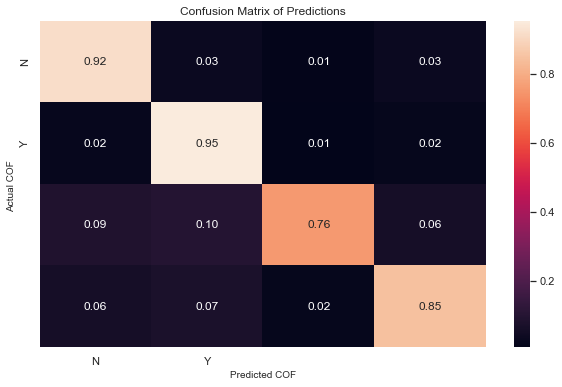

**********************************************************************


Confusion Matrix for Random Forest model

[[2664  223   17   67]
 [ 162 4062   23   58]
 [ 192  224  544   37]
 [ 164  272   27 1290]]


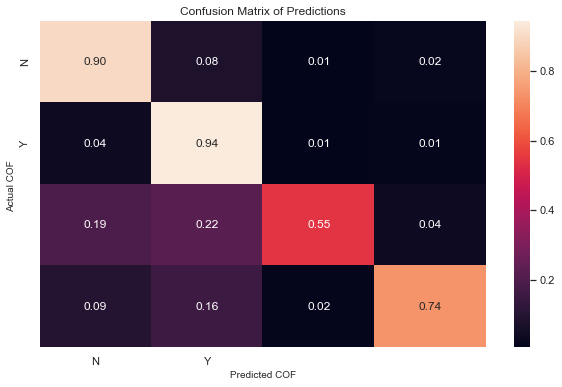

**********************************************************************


Confusion Matrix for Decision Tree model

[[2302  313  138  218]
 [ 267 3700  139  199]
 [ 157  195  550   95]
 [ 201  264   76 1212]]


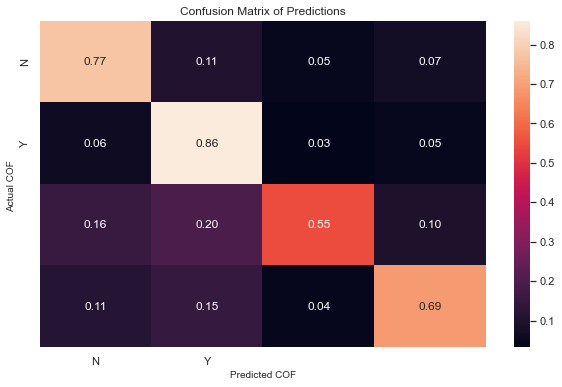

**********************************************************************


Confusion Matrix for Naive Bayes model

[[1425 1424  122    0]
 [1133 3055  117    0]
 [ 414  475  108    0]
 [ 709  994   50    0]]


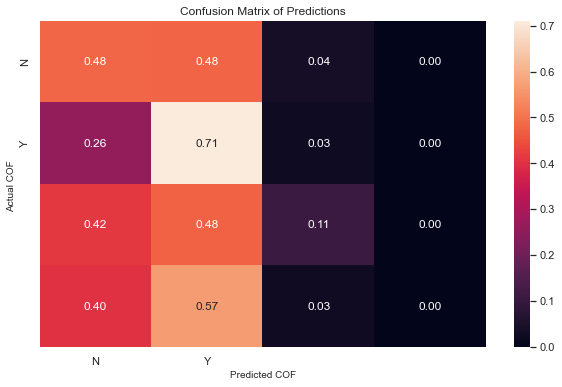

**********************************************************************


Confusion Matrix for Support Vector Machine model

[[1629 1313   13   16]
 [ 705 3580    5   15]
 [ 424  536   29    8]
 [ 666 1023    1   63]]


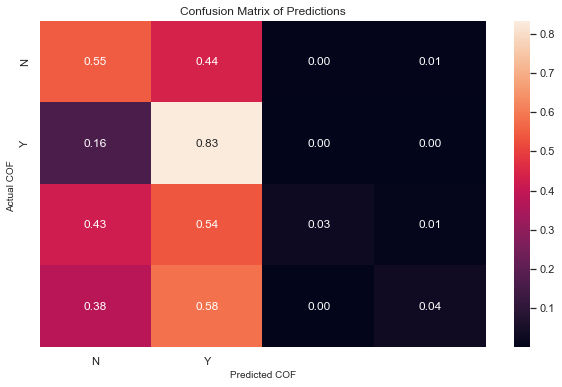

**********************************************************************




In [114]:
d = {'Name' : [], 'KNeaarest Neighbor': [], 'Random Forest': [], 'Decision Tree': [], 'Naive Bayes': [], 
     'Support Vector Machine': []}

models = [ [KNeighborsClassifier(n_neighbors=1), 'KNeaarest Neighbor'], [RandomForestClassifier(), 'Random Forest'], 
          [DecisionTreeClassifier(), 'Decision Tree'], [GaussianNB(), 'Naive Bayes'], [SVC(), 'Support Vector Machine'] ]

for model in models:
    d = Matrix(model[0], model[1], d)

### Build a model to predict where the next crime would happen by District

In [143]:
print("There are",data.District.nunique(),"unique police districts in the dataset.")
print("There are",data['Primary Type'].nunique(),"unique crime types in the dataset.")

There are 23 unique police districts in the dataset.
There are 15 unique crime types in the dataset.


In [144]:
# Moving the Outcome 'District', 'Primary Type' to the end of the dataframe.

cols_at_end = ['District', 'Primary Type']
for col in cols_at_end:
    dis_data = new_data[[c for c in new_data if c not in cols_at_end] + [c for c in cols_at_end if c in new_data]]
dis_data.head(5)

,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Month,Day,Period,District,Primary Type
0,30275,156,460,171,0,0,45,9,46,16,67163,24442,7,531,5,2,0,3,3
2,25726,83,215,145,1,0,207,38,12,6,20541,110378,6,531,0,0,2,15,2
6,3532,19,431,66,0,0,183,28,25,3,13002,68248,5,531,10,2,1,13,12
7,19532,249,349,15,1,0,301,36,23,20,20935,79550,13,335,2,5,2,21,7
8,15528,101,136,171,0,0,174,25,23,8,28066,81332,9,335,6,6,2,12,6


#### feature selection

In [145]:
X = dis_data.iloc[:,0:16]
Y = dis_data.iloc[:,-2]

Y = Y.to_numpy()

# feature extraction
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[3.379e+09 2.323e+05 1.142e+05 3.871e+05 9.516e+03       nan 6.673e+07
 8.467e+06 1.434e+07 2.349e+04 7.424e+09 1.879e+10 9.273e+03 2.326e+04
 1.245e+02 5.746e+02]
[[ 30275    156    460    171      0      0     45      9     46     16
   67163  24442      7    531      5      2]
 [ 25726     83    215    145      1      0    207     38     12      6
   20541 110378      6    531      0      0]
 [  3532     19    431     66      0      0    183     28     25      3
   13002  68248      5    531     10      2]
 [ 19532    249    349     15      1      0    301     36     23     20
   20935  79550     13    335      2      5]
 [ 15528    101    136    171      0      0    174     25     23      8
   28066  81332      9    335      6      6]]


In [146]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['input', 'score']

feature_scores.sort_values(by=['score'], ascending=False)

,input,score
11,Y Coordinate,1.879376e+10
10,X Coordinate,7.424104e+09
0,Block,3.378658e+09
6,Beat,6.672504e+07
8,Community Area,1.434239e+07
7,Ward,8.466785e+06
3,Location Description,3.870835e+05
1,IUCR,2.322932e+05
2,Description,1.141510e+05
9,FBI Code,2.348803e+04


In [147]:
dis_df = dis_data[['Y Coordinate', 'X Coordinate', 'Block', 'Beat', 'Community Area', 'Ward', 'Location Description', 
                   'District', 'Primary Type']]
dis_df.head(5)

,Y Coordinate,X Coordinate,Block,Beat,Community Area,Ward,Location Description,District,Primary Type
0,24442,67163,30275,45,46,9,171,3,3
2,110378,20541,25726,207,12,38,145,15,2
6,68248,13002,3532,183,25,28,66,13,12
7,79550,20935,19532,301,23,36,15,21,7
8,81332,28066,15528,174,23,25,171,12,6


In [148]:
dis_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y Coordinate,1361835.0,59741.138811,29068.777764,0.0,34855.0,63892.0,81548.0,117134.0
X Coordinate,1361835.0,38441.640680,15181.206805,0.0,27323.0,39911.0,49929.0,70172.0
Block,1361835.0,16477.980398,9935.066929,0.0,7445.0,16512.0,25544.0,33840.0
Beat,1361835.0,141.919936,87.415674,0.0,66.0,131.0,217.0,302.0
Community Area,1361835.0,37.002983,21.758645,0.0,22.0,32.0,56.0,77.0
Ward,1361835.0,21.963031,14.133700,0.0,9.0,22.0,33.0,49.0
Location Description,1361835.0,131.889711,52.592047,6.0,127.0,150.0,171.0,197.0
District,1361835.0,9.826751,6.219582,0.0,5.0,9.0,15.0,22.0
Primary Type,1361835.0,6.576316,4.937569,0.0,2.0,5.0,13.0,14.0


#### Preprocessing

In [149]:
# Rescaling to remove varying scale.

array = dis_df.values
# separate array into input and output components
X = array[:,0:7]
Y = array[:,-2]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)

print(rescaledX)

[[0.209 0.957 0.895 ... 0.597 0.184 0.864]
 [0.942 0.293 0.76  ... 0.156 0.776 0.728]
 [0.583 0.185 0.104 ... 0.325 0.571 0.314]
 ...
 [0.648 0.698 0.102 ... 0.104 0.837 0.283]
 [0.649 0.685 0.051 ... 0.104 0.837 0.675]
 [0.701 0.461 0.244 ... 0.312 0.    0.864]]


In [150]:
rescaledXDF = pd.DataFrame(rescaledX, columns = ['Y Coordinate', 'X Coordinate', 'Block', 'Beat', 'Community Area', 
                                                 'Ward', 'Location Description'])

rescaledXDF.head(5)

,Y Coordinate,X Coordinate,Block,Beat,Community Area,Ward,Location Description
0,0.208667,0.957120,0.894651,0.149007,0.597403,0.183673,0.863874
1,0.942322,0.292724,0.760225,0.685430,0.155844,0.775510,0.727749
2,0.582649,0.185288,0.104374,0.605960,0.324675,0.571429,0.314136
3,0.679137,0.298338,0.577187,0.996689,0.298701,0.734694,0.047120
4,0.694350,0.399960,0.458865,0.576159,0.298701,0.510204,0.863874


In [151]:
rescaledXDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Y Coordinate,1361835.0,0.510024,0.248167,0.0,0.297565,0.545461,0.696194,1.0
X Coordinate,1361835.0,0.547820,0.216343,0.0,0.389372,0.568760,0.711523,1.0
Block,1361835.0,0.486938,0.293589,0.0,0.220006,0.487943,0.754846,1.0
Beat,1361835.0,0.469934,0.289456,0.0,0.218543,0.433775,0.718543,1.0
Community Area,1361835.0,0.480558,0.282580,0.0,0.285714,0.415584,0.727273,1.0
Ward,1361835.0,0.448225,0.288443,0.0,0.183673,0.448980,0.673469,1.0
Location Description,1361835.0,0.659108,0.275351,0.0,0.633508,0.753927,0.863874,1.0


In [152]:
# Standardizing - this is to ensure we have almost a uniform standard deviation

scaler = StandardScaler().fit(rescaledX)
restandardX = scaler.transform(rescaledX)

print(restandardX)

[[-1.214  1.892  1.389 ...  0.413 -0.917  0.744]
 [ 1.742 -1.179  0.931 ... -1.149  1.135  0.249]
 [ 0.293 -1.676 -1.303 ... -0.552  0.427 -1.253]
 ...
 [ 0.557  0.696 -1.312 ... -1.333  1.347 -1.367]
 [ 0.561  0.633 -1.483 ... -1.333  1.347  0.059]
 [ 0.768 -0.399 -0.829 ... -0.598 -1.554  0.744]]


In [153]:
restandardXDF = pd.DataFrame(restandardX, columns = ['Y Coordinate', 'X Coordinate', 'Block', 'Beat', 'Community Area', 
                                                 'Ward', 'Location Description'])

restandardXDF.head(5)

,Y Coordinate,X Coordinate,Block,Beat,Community Area,Ward,Location Description
0,-1.214332,1.891903,1.388720,-1.108725,0.413492,-0.917172,0.743654
1,1.741968,-1.179132,0.930847,0.744490,-1.149106,1.134662,0.249283
2,0.292646,-1.675733,-1.303060,0.469940,-0.551642,0.427133,-1.252846
3,0.681448,-1.153179,0.307398,1.819812,-0.643560,0.993156,-2.222575
4,0.742751,-0.683453,-0.095619,0.366983,-0.643560,0.214874,0.743654


In [154]:
restandardXDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Y Coordinate,1361835.0,3.078902e-16,1.0,-2.055166,-0.856113,0.142795,0.750182,1.974382
X Coordinate,1361835.0,-1.051798e-15,1.0,-2.532187,-0.732395,0.096788,0.756683,2.090109
Block,1361835.0,-1.486271e-16,1.0,-1.658568,-0.909202,0.003424,0.912528,1.747550
Beat,1361835.0,5.295646e-16,1.0,-1.623507,-0.868494,-0.124920,0.858886,1.831252
Community Area,1361835.0,4.965863e-16,1.0,-1.700611,-0.689519,-0.229931,0.873079,1.838213
Ward,1361835.0,-4.924496e-16,1.0,-1.553948,-0.917172,0.002616,0.780898,1.912944
Location Description,1361835.0,7.873322e-16,1.0,-2.393703,-0.092974,0.344354,0.743654,1.238026


In [155]:
# Normalizing

scaler = Normalizer().fit(restandardXDF)
NormalizedX = scaler.transform(restandardXDF)

print(NormalizedX)

[[-0.388  0.605  0.444 ...  0.132 -0.293  0.238]
 [ 0.597 -0.404  0.319 ... -0.394  0.389  0.085]
 [ 0.112 -0.639 -0.497 ... -0.21   0.163 -0.478]
 ...
 [ 0.187  0.234 -0.44  ... -0.447  0.452 -0.459]
 [ 0.206  0.233 -0.546 ... -0.49   0.495  0.022]
 [ 0.345 -0.179 -0.373 ... -0.269 -0.698  0.334]]


In [156]:
NormalizedXDF = pd.DataFrame(NormalizedX, columns = ['Y Coordinate', 'X Coordinate', 'Block', 'Beat', 'Community Area', 
                                                 'Ward', 'Location Description'])

NormalizedXDF.head(5)

,Y Coordinate,X Coordinate,Block,Beat,Community Area,Ward,Location Description
0,-0.388362,0.605059,0.444134,-0.354587,0.132241,-0.293326,0.237832
1,0.596943,-0.404069,0.318985,0.255124,-0.393779,0.388829,0.085425
2,0.111660,-0.639383,-0.497188,0.179307,-0.210481,0.162974,-0.478029
3,0.200593,-0.339453,0.090486,0.535685,-0.189440,0.292348,-0.654243
4,0.503520,-0.463321,-0.064821,0.248782,-0.436277,0.145666,0.504133


In [157]:
NormalizedXDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Y Coordinate,1361835.0,0.004426,0.358828,-0.749553,-0.335391,0.087686,0.321775,0.680349
X Coordinate,1361835.0,-0.033194,0.389562,-0.943541,-0.373503,0.039291,0.272747,0.727373
Block,1361835.0,-0.023708,0.389060,-0.934960,-0.380968,0.001776,0.338581,0.639143
Beat,1361835.0,-0.015428,0.359633,-0.831150,-0.320358,-0.069033,0.326505,0.839471
Community Area,1361835.0,-0.000541,0.395893,-0.677243,-0.334017,-0.081382,0.386900,0.889447
Ward,1361835.0,-0.018412,0.373480,-0.897716,-0.337838,0.000926,0.299004,0.681377
Location Description,1361835.0,0.043472,0.372037,-0.971189,-0.055987,0.165397,0.284621,0.918541


In [158]:
#add 'District', 'Primary Type' array as new column...

NormalizedXDF['District', 'Primary Type'] = Y.tolist()

NormalizedXDF.head(5)

,Y Coordinate,X Coordinate,Block,Beat,Community Area,Ward,Location Description,"(District, Primary Type)"
0,-0.388362,0.605059,0.444134,-0.354587,0.132241,-0.293326,0.237832,3
1,0.596943,-0.404069,0.318985,0.255124,-0.393779,0.388829,0.085425,15
2,0.111660,-0.639383,-0.497188,0.179307,-0.210481,0.162974,-0.478029,13
3,0.200593,-0.339453,0.090486,0.535685,-0.189440,0.292348,-0.654243,21
4,0.503520,-0.463321,-0.064821,0.248782,-0.436277,0.145666,0.504133,12


In [159]:
NormalizedXDF.shape

(1361835, 8)

In [160]:
# sample with seed
drand_df = NormalizedXDF.sample(n=40000, random_state=5)
drand_df.head(5)

,Y Coordinate,X Coordinate,Block,Beat,Community Area,Ward,Location Description,"(District, Primary Type)"
176447,-0.463133,-0.073735,0.520612,-0.333414,0.567241,-0.131346,0.242600,5
52370,-0.550209,0.428681,0.522452,-0.333087,0.206011,-0.293723,-0.029775,3
983158,-0.213476,-0.674142,0.218008,-0.304599,0.456545,0.001368,0.388867,7
446948,0.495831,0.019266,0.227182,0.350015,0.545628,0.525808,0.073993,18
1275883,-0.517835,0.063108,0.494250,0.423937,0.538936,-0.086535,0.076933,19


In [161]:
drand_df.shape

(40000, 8)

In [162]:
x = drand_df.iloc[:, :-1]
x.head()

,Y Coordinate,X Coordinate,Block,Beat,Community Area,Ward,Location Description
176447,-0.463133,-0.073735,0.520612,-0.333414,0.567241,-0.131346,0.242600
52370,-0.550209,0.428681,0.522452,-0.333087,0.206011,-0.293723,-0.029775
983158,-0.213476,-0.674142,0.218008,-0.304599,0.456545,0.001368,0.388867
446948,0.495831,0.019266,0.227182,0.350015,0.545628,0.525808,0.073993
1275883,-0.517835,0.063108,0.494250,0.423937,0.538936,-0.086535,0.076933


In [163]:
y = drand_df.iloc[:, -1]
y.head()

176447      5
52370       3
983158      7
446948     18
1275883    19
Name: (District, Primary Type), dtype: int64

#### data balancing

In [164]:
#sm = SMOTEENN(random_state=101)
#x,y = sm.fit_resample(X,Y)

### Modeling

In [165]:
#Building Models

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 0)

### Algorithms

In [166]:
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    cla = model
    cla.fit(xtrain, ytrain)
    
    predicted = cla.predict(xtrain)
    tr_auc = accuracy_score(predicted, ytrain)*100
    #     print("Print accuracy on Training data is {}".format(tr_auc))
    
    predicted = cla.predict(xtest)
    te_auc = accuracy_score(predicted, ytest)*100

    Recall = recall_score(predicted, ytest, average = 'micro')
    
    Precision = precision_score(predicted, ytest, average = 'micro')
    
    F1 = f1_score(predicted, ytest, average = 'micro')
    
    MSE = mean_squared_error(predicted, ytest)
    
    d['Name'].append(name)
    d['Training ACU'].append(tr_auc)
    d['Testing ACU'].append(te_auc)
    d['Recall'].append(Recall)
    d['Precision'].append(Precision)
    d['F1_Score'].append(F1)
    d['MSE'].append(MSE)
    
    print("**********"*5)
    print()
    return d

In [ ]:
, 

In [167]:
d = {'Name' : [], 'Training ACU': [], 'Testing ACU': [], 'Recall': [], 'Precision': [], 'F1_Score': [], 'MSE': []}
models = [ [KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=8), 'KNeaarest Neighbor'], 
          [RandomForestClassifier(), 'Random Forest'], [DecisionTreeClassifier(), 'Decision Tree'], 
          [CatBoostClassifier(), 'CatBoost'], [XGBClassifier(), 'xgboost'], [GaussianNB(), 'Naive Bayes'], 
          [SVC(), 'Support Vector Machine'], [LGBMClassifier(), 'LGBM'], [LinearDiscriminantAnalysis(), 'LDA'] ]

for model in models:
    d = Models(model[0], model[1], d)

acu_data = pd.DataFrame(data = d)

Working on KNeaarest Neighbor model
**************************************************

Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on CatBoost model
Learning rate set to 0.094425
0:	learn: 2.3259891	total: 121ms	remaining: 2m
1:	learn: 1.9700836	total: 236ms	remaining: 1m 58s
2:	learn: 1.7603434	total: 357ms	remaining: 1m 58s
3:	learn: 1.5938361	total: 478ms	remaining: 1m 58s
4:	learn: 1.4280067	total: 660ms	remaining: 2m 11s
5:	learn: 1.3083124	total: 809ms	remaining: 2m 14s
6:	learn: 1.2049038	total: 946ms	remaining: 2m 14s
7:	learn: 1.1203817	total: 1.08s	remaining: 2m 14s
8:	learn: 1.0484033	total: 1.22s	remaining: 2m 14s
9:	learn: 0.9767217	total: 1.36s	remaining: 2m 14s
10:	learn: 0.9154194	total: 1.51s	remaining: 2m 15s
11:	learn: 0.8646477	total: 1.64s	remaining: 2m 15s
12:	learn: 0.8163063	total: 1.79s	remaining: 2m 16s
13:	learn: 0.7748596	total: 

154:	learn: 0.0719473	total: 21.5s	remaining: 1m 57s
155:	learn: 0.0713247	total: 21.6s	remaining: 1m 57s
156:	learn: 0.0708806	total: 21.8s	remaining: 1m 57s
157:	learn: 0.0703003	total: 21.9s	remaining: 1m 56s
158:	learn: 0.0697877	total: 22.1s	remaining: 1m 56s
159:	learn: 0.0690698	total: 22.2s	remaining: 1m 56s
160:	learn: 0.0685962	total: 22.4s	remaining: 1m 56s
161:	learn: 0.0680262	total: 22.5s	remaining: 1m 56s
162:	learn: 0.0673128	total: 22.6s	remaining: 1m 56s
163:	learn: 0.0667860	total: 22.8s	remaining: 1m 56s
164:	learn: 0.0663255	total: 22.9s	remaining: 1m 55s
165:	learn: 0.0656855	total: 23s	remaining: 1m 55s
166:	learn: 0.0650404	total: 23.2s	remaining: 1m 55s
167:	learn: 0.0646507	total: 23.3s	remaining: 1m 55s
168:	learn: 0.0643984	total: 23.4s	remaining: 1m 55s
169:	learn: 0.0638859	total: 23.6s	remaining: 1m 55s
170:	learn: 0.0633144	total: 23.7s	remaining: 1m 55s
171:	learn: 0.0627525	total: 23.9s	remaining: 1m 54s
172:	learn: 0.0622561	total: 24s	remaining: 1m 5

310:	learn: 0.0319578	total: 42.8s	remaining: 1m 34s
311:	learn: 0.0318651	total: 42.9s	remaining: 1m 34s
312:	learn: 0.0317084	total: 43.1s	remaining: 1m 34s
313:	learn: 0.0316121	total: 43.2s	remaining: 1m 34s
314:	learn: 0.0315010	total: 43.4s	remaining: 1m 34s
315:	learn: 0.0313517	total: 43.5s	remaining: 1m 34s
316:	learn: 0.0311663	total: 43.6s	remaining: 1m 34s
317:	learn: 0.0311214	total: 43.8s	remaining: 1m 33s
318:	learn: 0.0310027	total: 43.9s	remaining: 1m 33s
319:	learn: 0.0309325	total: 44s	remaining: 1m 33s
320:	learn: 0.0307731	total: 44.2s	remaining: 1m 33s
321:	learn: 0.0306977	total: 44.3s	remaining: 1m 33s
322:	learn: 0.0305451	total: 44.4s	remaining: 1m 33s
323:	learn: 0.0304511	total: 44.6s	remaining: 1m 32s
324:	learn: 0.0303591	total: 44.7s	remaining: 1m 32s
325:	learn: 0.0302077	total: 44.8s	remaining: 1m 32s
326:	learn: 0.0300644	total: 45s	remaining: 1m 32s
327:	learn: 0.0299877	total: 45.1s	remaining: 1m 32s
328:	learn: 0.0299082	total: 45.3s	remaining: 1m 3

466:	learn: 0.0201470	total: 1m 6s	remaining: 1m 15s
467:	learn: 0.0201152	total: 1m 6s	remaining: 1m 15s
468:	learn: 0.0200714	total: 1m 6s	remaining: 1m 15s
469:	learn: 0.0200471	total: 1m 6s	remaining: 1m 15s
470:	learn: 0.0200196	total: 1m 7s	remaining: 1m 15s
471:	learn: 0.0199823	total: 1m 7s	remaining: 1m 15s
472:	learn: 0.0199191	total: 1m 7s	remaining: 1m 15s
473:	learn: 0.0198670	total: 1m 7s	remaining: 1m 14s
474:	learn: 0.0198386	total: 1m 7s	remaining: 1m 14s
475:	learn: 0.0198071	total: 1m 7s	remaining: 1m 14s
476:	learn: 0.0197493	total: 1m 7s	remaining: 1m 14s
477:	learn: 0.0197241	total: 1m 8s	remaining: 1m 14s
478:	learn: 0.0196908	total: 1m 8s	remaining: 1m 14s
479:	learn: 0.0196581	total: 1m 8s	remaining: 1m 14s
480:	learn: 0.0196201	total: 1m 8s	remaining: 1m 13s
481:	learn: 0.0195590	total: 1m 8s	remaining: 1m 13s
482:	learn: 0.0195351	total: 1m 8s	remaining: 1m 13s
483:	learn: 0.0194925	total: 1m 8s	remaining: 1m 13s
484:	learn: 0.0194340	total: 1m 9s	remaining: 

622:	learn: 0.0146899	total: 1m 28s	remaining: 53.3s
623:	learn: 0.0146399	total: 1m 28s	remaining: 53.2s
624:	learn: 0.0146225	total: 1m 28s	remaining: 53.1s
625:	learn: 0.0145917	total: 1m 28s	remaining: 52.9s
626:	learn: 0.0145718	total: 1m 28s	remaining: 52.8s
627:	learn: 0.0145385	total: 1m 28s	remaining: 52.6s
628:	learn: 0.0145180	total: 1m 28s	remaining: 52.5s
629:	learn: 0.0144935	total: 1m 29s	remaining: 52.3s
630:	learn: 0.0144827	total: 1m 29s	remaining: 52.2s
631:	learn: 0.0144621	total: 1m 29s	remaining: 52.1s
632:	learn: 0.0144464	total: 1m 29s	remaining: 51.9s
633:	learn: 0.0144312	total: 1m 29s	remaining: 51.8s
634:	learn: 0.0144101	total: 1m 29s	remaining: 51.6s
635:	learn: 0.0143909	total: 1m 29s	remaining: 51.5s
636:	learn: 0.0143684	total: 1m 30s	remaining: 51.4s
637:	learn: 0.0143497	total: 1m 30s	remaining: 51.2s
638:	learn: 0.0143351	total: 1m 30s	remaining: 51.1s
639:	learn: 0.0143042	total: 1m 30s	remaining: 50.9s
640:	learn: 0.0142805	total: 1m 30s	remaining:

778:	learn: 0.0115132	total: 1m 49s	remaining: 31.1s
779:	learn: 0.0114946	total: 1m 49s	remaining: 30.9s
780:	learn: 0.0114780	total: 1m 49s	remaining: 30.8s
781:	learn: 0.0114730	total: 1m 49s	remaining: 30.6s
782:	learn: 0.0114574	total: 1m 50s	remaining: 30.5s
783:	learn: 0.0114470	total: 1m 50s	remaining: 30.4s
784:	learn: 0.0114334	total: 1m 50s	remaining: 30.2s
785:	learn: 0.0114124	total: 1m 50s	remaining: 30.1s
786:	learn: 0.0114074	total: 1m 50s	remaining: 30s
787:	learn: 0.0114044	total: 1m 50s	remaining: 29.8s
788:	learn: 0.0113789	total: 1m 50s	remaining: 29.7s
789:	learn: 0.0113620	total: 1m 51s	remaining: 29.5s
790:	learn: 0.0113515	total: 1m 51s	remaining: 29.4s
791:	learn: 0.0113345	total: 1m 51s	remaining: 29.2s
792:	learn: 0.0113234	total: 1m 51s	remaining: 29.1s
793:	learn: 0.0113108	total: 1m 51s	remaining: 29s
794:	learn: 0.0112832	total: 1m 51s	remaining: 28.8s
795:	learn: 0.0112546	total: 1m 51s	remaining: 28.7s
796:	learn: 0.0112466	total: 1m 52s	remaining: 28.

935:	learn: 0.0093617	total: 2m 12s	remaining: 9.07s
936:	learn: 0.0093572	total: 2m 12s	remaining: 8.93s
937:	learn: 0.0093532	total: 2m 12s	remaining: 8.79s
938:	learn: 0.0093409	total: 2m 13s	remaining: 8.64s
939:	learn: 0.0093278	total: 2m 13s	remaining: 8.5s
940:	learn: 0.0093224	total: 2m 13s	remaining: 8.36s
941:	learn: 0.0093152	total: 2m 13s	remaining: 8.21s
942:	learn: 0.0093050	total: 2m 13s	remaining: 8.07s
943:	learn: 0.0092914	total: 2m 13s	remaining: 7.93s
944:	learn: 0.0092860	total: 2m 13s	remaining: 7.78s
945:	learn: 0.0092601	total: 2m 13s	remaining: 7.64s
946:	learn: 0.0092509	total: 2m 14s	remaining: 7.5s
947:	learn: 0.0092458	total: 2m 14s	remaining: 7.36s
948:	learn: 0.0092425	total: 2m 14s	remaining: 7.22s
949:	learn: 0.0092276	total: 2m 14s	remaining: 7.08s
950:	learn: 0.0092050	total: 2m 14s	remaining: 6.93s
951:	learn: 0.0091946	total: 2m 14s	remaining: 6.79s
952:	learn: 0.0091804	total: 2m 14s	remaining: 6.65s
953:	learn: 0.0091691	total: 2m 15s	remaining: 6

In [168]:
acu_data

,Name,Training ACU,Testing ACU,Recall,Precision,F1_Score,MSE
0,KNeaarest Neighbor,98.759375,98.3125,0.983125,0.983125,0.983125,0.060375
1,Random Forest,99.993750,99.7625,0.997625,0.997625,0.997625,0.007250
2,Decision Tree,99.993750,98.9750,0.989750,0.989750,0.989750,0.047625
3,CatBoost,99.950000,99.7750,0.997750,0.997750,0.997750,0.004125
4,xgboost,99.993750,99.7125,0.997125,0.997125,0.997125,0.025125
5,Naive Bayes,86.796875,86.8750,0.868750,0.868750,0.868750,0.761500
6,Support Vector Machine,97.887500,97.4375,0.974375,0.974375,0.974375,0.059750
7,LGBM,35.568750,34.7750,0.347750,0.347750,0.347750,25.478375


### Model Evaluation
#### Confusion Matrix

In [169]:
def Matrix(model, name, d):
    print("Confusion Matrix for {} model".format(name))
    print()
    
    y_pred = cross_val_predict(model, x, y, cv=3)
    conf_mat = confusion_matrix(y, y_pred)
    print(conf_mat)
    
    cm = conf_mat
    labls =['N','Y']
    sns.set(font_scale = 1)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labls, yticklabels=labls)
    plt.ylabel('Actual COF ', size = 10)
    plt.xlabel('Predicted COF', size = 10)
    plt.title('Confusion Matrix of Predictions', size = 12)

    # print('confusion matrix for KNeaarest Neighbor')
    plt.show(block=False)
    
    d['Name'].append(name)
    
    print("**********"*10)
    print()
    print()
    return d

Confusion Matrix for KNeaarest Neighbor model

[[1725   13    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [  14 1771   38    0    0    0    1    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0   14 1837   41    0    4    8    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0   46 2298    3    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    7 1677   15    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    4    3   30 2174   35    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0   37 2191    1    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    3    0    7 2919   10    1    0    0    0    0
     0    1    0    0    0    0    0    0

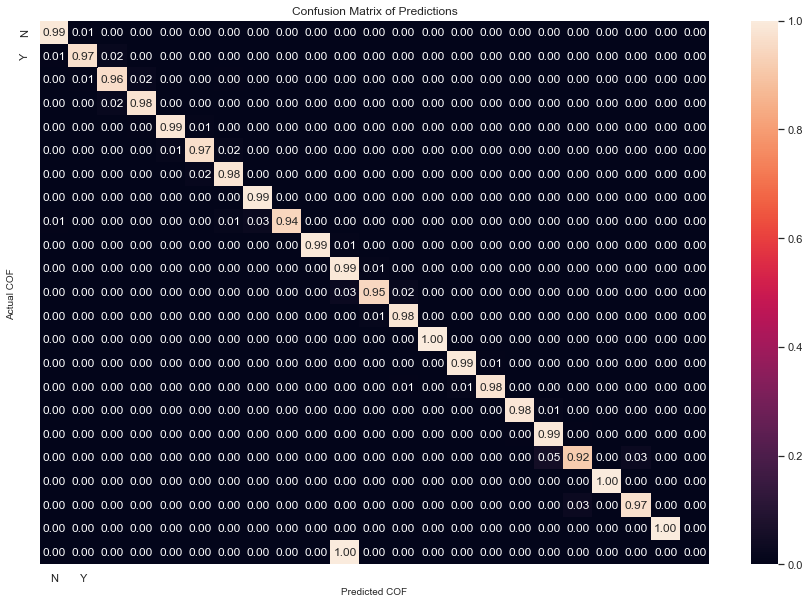

****************************************************************************************************


Confusion Matrix for Random Forest model

[[1739    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   2 1816    6    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    8 1887    4    0    0    5    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0   10 2332    5    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    6 1690    3    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    1   11 2232    1    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    1 2228    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    

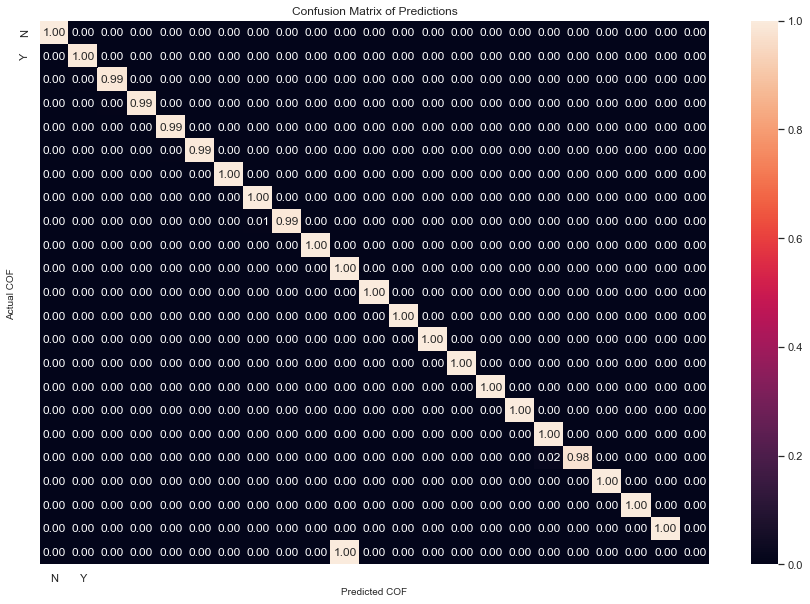

****************************************************************************************************


Confusion Matrix for Decision Tree model

[[1734    1    0    0    0    0    0    0    2    0    0    0    0    0
     0    0    2    0    0    0    0    0    0]
 [   4 1792   20    0    0    0    0    0    7    0    0    0    0    0
     0    0    0    0    0    2    0    0    0]
 [   0   14 1868   17    0    0    5    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0   14 2324    5    4    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0   14 1671   14    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    2    9   23 2203    8    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    5    0    0    6 2215    2    3    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    

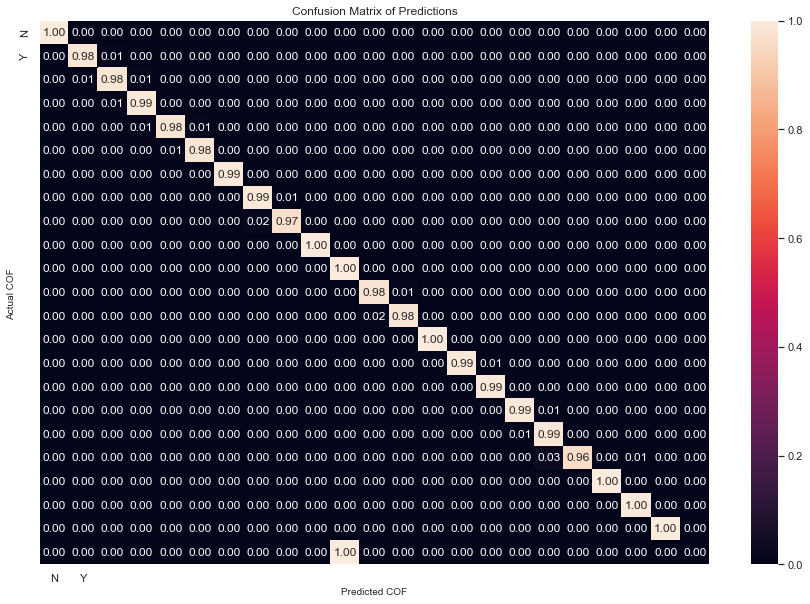

****************************************************************************************************


Confusion Matrix for Naive Bayes model

[[1607  132    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   2 1625  186    0    0    0    0    0   12    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0   22 1599  250    0    0    7    0   27    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0   64 2257    6   20    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0   32 1585   82    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0   44  282  200  942  750    3   25    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0   14 2009   67  140    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0 

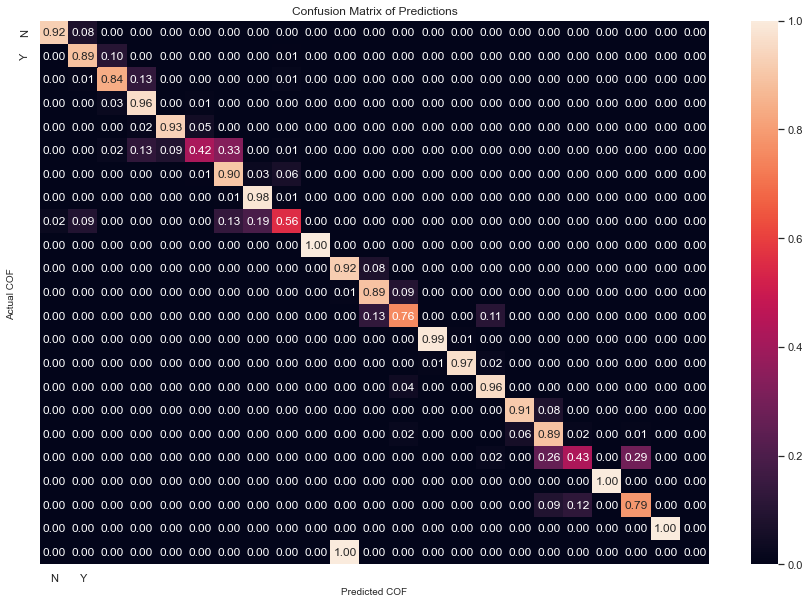

****************************************************************************************************


Confusion Matrix for Support Vector Machine model

[[1680   59    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   7 1721   96    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    1 1806   92    0    0    6    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0   49 2290    5    3    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0   22 1650   27    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0   91 2146    9    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0 2230    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0

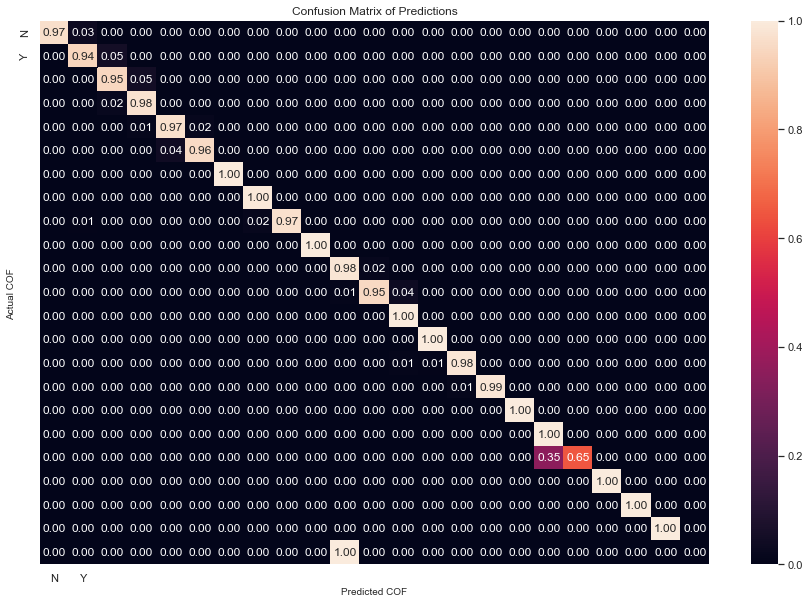

****************************************************************************************************




In [170]:
d = {'Name' : [], 'KNeaarest Neighbor': [], 'Random Forest': [], 'Decision Tree': [], 'Naive Bayes': [], 
     'Support Vector Machine': []}

models = [ [KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=8), 'KNeaarest Neighbor'], 
          [RandomForestClassifier(), 'Random Forest'], [DecisionTreeClassifier(), 'Decision Tree'], 
          [GaussianNB(), 'Naive Bayes'], [SVC(), 'Support Vector Machine'] ]

for model in models:
    d = Matrix(model[0], model[1], d)